In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
pd.options.display.max_rows = 130
pd.options.display.max_columns = 130

# Group Case Study 1 analysis

In [2]:
# Identifying the encoding of the csv files to be used for Group Case Study 1

with open(r'C:\upGrad\Group Case Study 1\application_data.csv') as f:
    print(f)

<_io.TextIOWrapper name='C:\\upGrad\\Group Case Study 1\\application_data.csv' mode='r' encoding='cp1252'>


### Importing the `application_data` dataset

In [3]:
# Reading data for the application_data file
path = r'C:\upGrad\Group Case Study 1'
application_data_df = pd.read_csv(path+'\\application_data.csv')

In [4]:
# Inspecting the application_data_df dataframe
application_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

###### Checking for duplicate ids

In [5]:
# Make sure that number of duplicate rows are zero
sum(application_data_df.duplicated(subset = "SK_ID_CURR")) == 0

True

#### Primary Checks

In [6]:
# Determining the number of rows and columns in file
application_data_df.shape

(307511, 122)

In [7]:
# Checking the information of the entire dataframe
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# Describing the statistical parameters of the dataframe
application_data_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
# Viewing the columns in the dataframe application_data_df
application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

##### Check for NA values in dataset

In [10]:
print (application_data_df.isnull().sum())  
print (application_data_df.isnull().values.any())
print (application_data_df.isnull().values.sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

##### checking the %  NAs columnwise

In [11]:
application_data_df.isnull().sum() * 100 / len(application_data_df)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### Business Case Understanding

#### Creating a new dataframe from the original 'application_data' dataframe selecting only some of the columns for purpose of EDA

In [12]:
App_EDA_df = application_data_df[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CNT_CHILDREN','AMT_INCOME_TOTAL',
                                  'AMT_CREDIT','AMT_ANNUITY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                                  'NAME_FAMILY_STATUS','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLAG_MOBIL',
                                  'FLAG_CONT_MOBILE','OCCUPATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE',
                                  'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                                  'DAYS_LAST_PHONE_CHANGE','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_GOODS_PRICE',
                                  'NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',     
                                  'REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_2',
                                  'EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_MON']].set_index('SK_ID_CURR', inplace = False)

App_EDA_df.head()

,TARGET,NAME_CONTRACT_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,OCCUPATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_GOODS_PRICE,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,-9461,-637,-2120,1,1,Laborers,2.0,2.0,2.0,2.0,-1134.0,N,Y,351000.0,House / apartment,1.0,2,2,Business Entity Type 3,0.083037,0.262949,0.139376,0.0
100003,0,Cash loans,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,-16765,-1188,-291,1,1,Core staff,1.0,0.0,1.0,0.0,-828.0,N,N,1129500.0,House / apartment,2.0,1,1,School,0.311267,0.622246,NaN,0.0
100004,0,Revolving loans,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,-19046,-225,-2531,1,1,Laborers,0.0,0.0,0.0,0.0,-815.0,Y,Y,135000.0,House / apartment,1.0,2,2,Government,NaN,0.555912,0.729567,0.0
100006,0,Cash loans,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,-19005,-3039,-2437,1,1,Laborers,2.0,0.0,2.0,0.0,-617.0,N,Y,297000.0,House / apartment,2.0,2,2,Business Entity Type 3,NaN,0.650442,NaN,NaN
100007,0,Cash loans,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,-19932,-3038,-3458,1,1,Core staff,0.0,0.0,0.0,0.0,-1106.0,N,Y,513000.0,House / apartment,1.0,2,2,Religion,NaN,0.322738,NaN,0.0


#### Primary checks on required dataframe

In [13]:
# Checking the information for App_EDA_df
App_EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 32 columns):
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
DAYS_ID_PUBLISH                307511 non-null int64
FLAG_MOBIL                     307511 non-null int64
FLAG_CONT_MOBILE               307511 non-null int64
OCCUPATION_TYPE                211120 non-null object
OBS_30_CNT_SOCIAL_CIRCLE       306490 non-null float64
DEF_30_CNT_SOCIAL_CIRCL

In [14]:
# Describing the statistical parameters for App_EDA_df
App_EDA_df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,3.072330e+05,307509.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,-16036.995067,63815.045904,-2994.202373,0.999997,0.998133,1.422245,0.143421,1.405292,0.100049,-962.858788,5.383962e+05,2.152665,2.052463,2.031521,0.502130,5.143927e-01,0.510853,0.267395
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,4363.988632,141275.766519,1509.450419,0.001803,0.043164,2.400989,0.446698,2.379803,0.362291,826.808487,3.694465e+05,0.910682,0.509034,0.502737,0.211062,1.910602e-01,0.194844,0.916002
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,4.050000e+04,1.000000,1.000000,1.000000,0.014568,8.173617e-08,0.000527,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,-19682.000000,-2760.000000,-4299.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,2.385000e+05,2.000000,2.000000,2.000000,0.334007,3.924574e-01,0.370650,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,-15750.000000,-1213.000000,-3254.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,4.500000e+05,2.000000,2.000000,2.000000,0.505998,5.659614e-01,0.535276,0.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,-12413.000000,-289.000000,-1720.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,6.795000e+05,3.000000,2.000000,2.000000,0.675053,6.636171e-01,0.669057,0.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,-7489.000000,365243.000000,0.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.050000e+06,20.000000,3.000000,3.000000,0.962693,8.549997e-01,0.896010,27.000000


In [15]:
# Checking the number of rows and columns in App_EDA_df
App_EDA_df.shape

(307511, 32)

In [16]:
# Viewing all the columns in App_EDA_df
App_EDA_df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_GOODS_PRICE', 'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_MON'],
      dtype='object')

##### Check for NA values in dataset

In [17]:
# Getting the column-wise Null count
print (App_EDA_df.isnull().sum())  
print (App_EDA_df.isnull().values.any())
print (App_EDA_df.isnull().values.sum())

TARGET                              0
NAME_CONTRACT_TYPE                  0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_CONT_MOBILE                    0
OCCUPATION_TYPE                 96391
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
DAYS_LAST_PHONE_CHANGE              1
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
AMT_GOODS_PRICE                   278
NAME_HOUSING_TYPE                   0
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATIN

##### checking the %  NAs columnwise

In [18]:
App_EDA_df.isnull().sum() * 100 / len(App_EDA_df)

TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_CONT_MOBILE                0.000000
OCCUPATION_TYPE                31.345545
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
AMT_GOODS_PRICE                 0.090403
NAME_HOUSING_TYPE               0.000000
CNT_FAM_MEMBERS 

<font color = purple> Given the relatively higher percentage of null values in EXT_SOURCE_1 and EXT_SOURCE_3 vs EXT_SOURCE_2, we elected to drop the former two columns.</font>

In [19]:
App_EDA_df.drop(['EXT_SOURCE_1', 'EXT_SOURCE_3'], axis=1, inplace=True)

### Univariate analysis of unordered categorical variables via frequency distribution of unique values

In [20]:
# Creating a list of categorical variables from App_EDA_df

cat_var = App_EDA_df.select_dtypes(include=['object']).columns
cat_var

Index(['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [21]:
# Retrieving frequency distribution for the categorical variables' unique values

for i in cat_var:
    print(App_EDA_df[i].value_counts().to_frame(), end='\n\n')

                 NAME_CONTRACT_TYPE
Cash loans                   278232
Revolving loans               29279

                      NAME_INCOME_TYPE
Working                         158774
Commercial associate             71617
Pensioner                        55362
State servant                    21703
Unemployed                          22
Student                             18
Businessman                         10
Maternity leave                      5

                               NAME_EDUCATION_TYPE
Secondary / secondary special               218391
Higher education                             74863
Incomplete higher                            10277
Lower secondary                               3816
Academic degree                                164

                      NAME_FAMILY_STATUS
Married                           196432
Single / not married               45444
Civil marriage                     29775
Separated                          19770
Widow                      

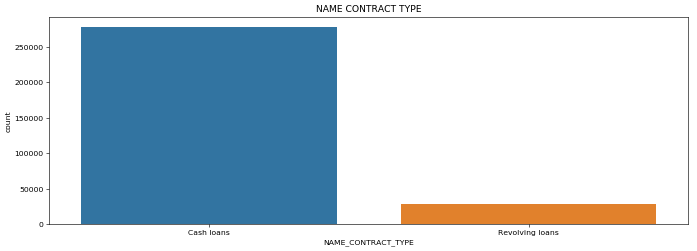

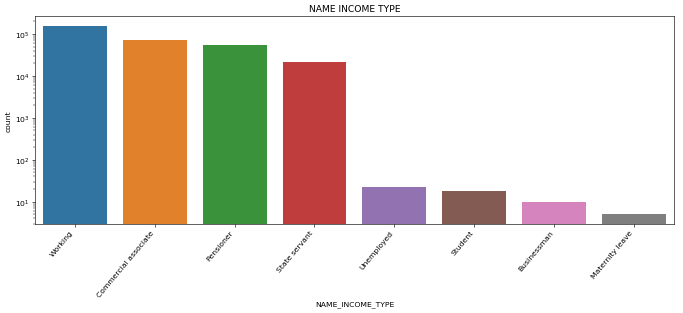

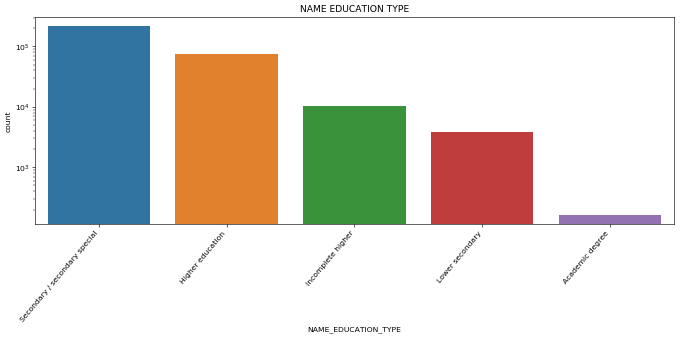

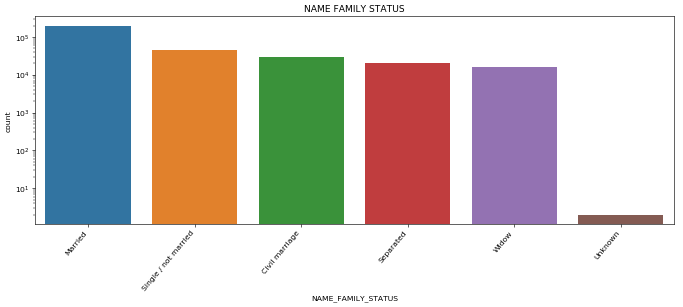

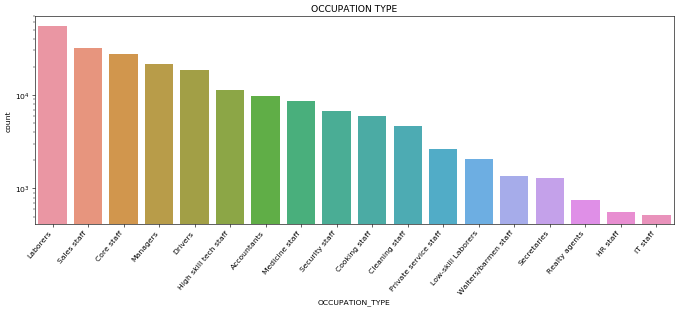

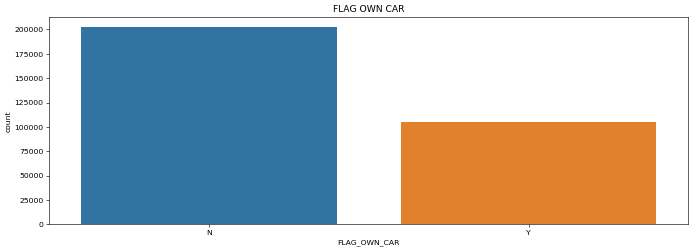

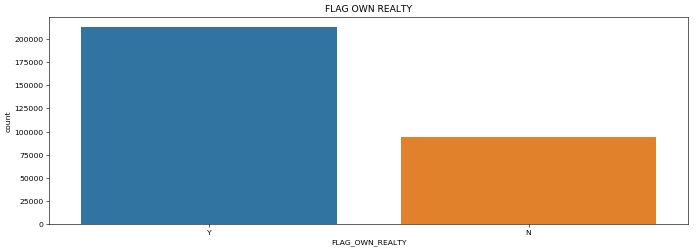

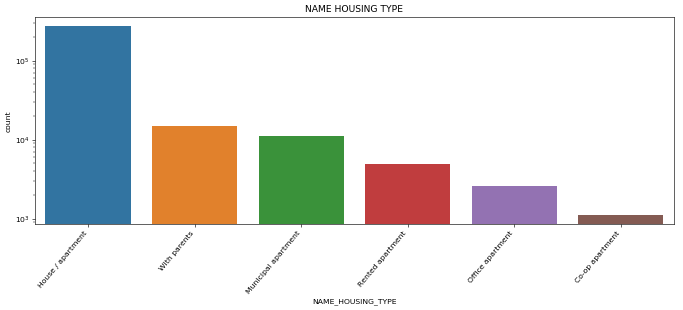

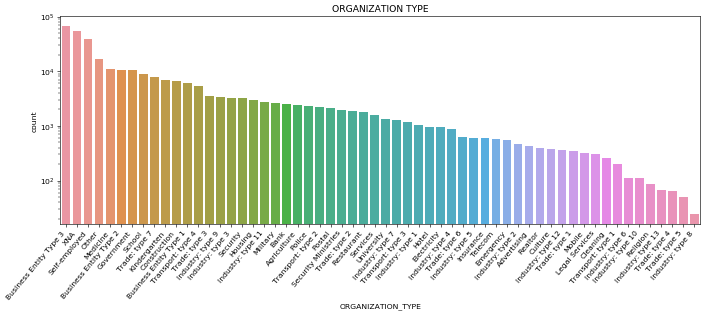

In [22]:
# using countplots for univariate analysis of categorical variables

for i in cat_var:
    
    # set figure size for larger figure
    plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

    # count plot
    ax = sns.countplot(x=App_EDA_df[i], data=App_EDA_df, order=App_EDA_df[i].value_counts().index)

    if len(App_EDA_df[i].unique()) > 2:
        
        # rotate and align the tick labels to look better
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

        # changing to a logarithmic scale so that the range can fit into the size of the plot.
        plt.yscale('log')

    # set title
    ax.set_title(' '.join([x for x in i.split('_')]))
    
    # show plot
    plt.show()

### Bivariate analysis of unordered categorical variables w.r.t `TARGET`

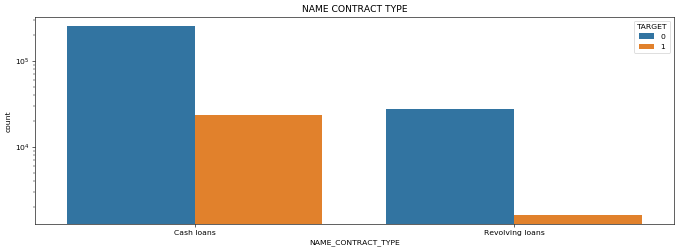

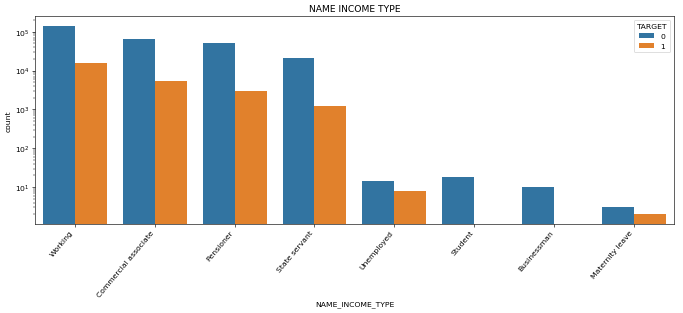

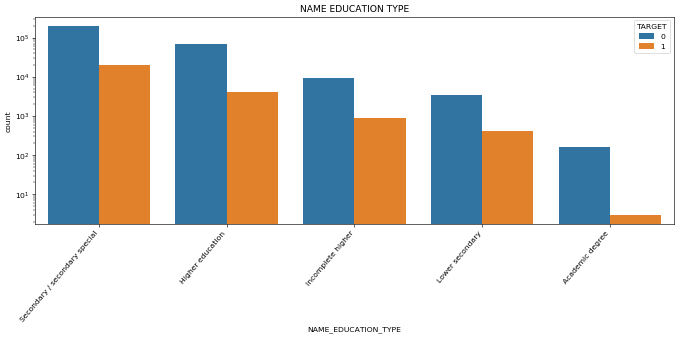

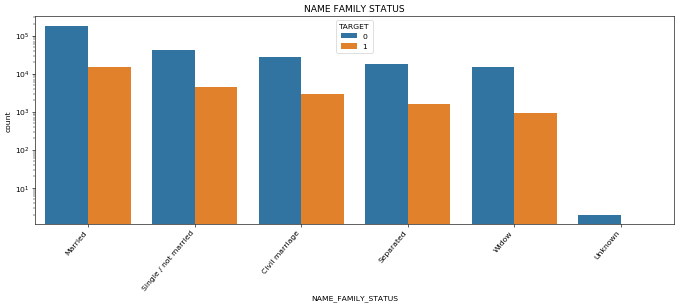

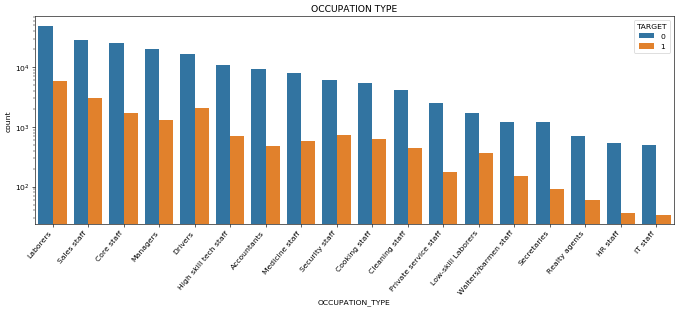

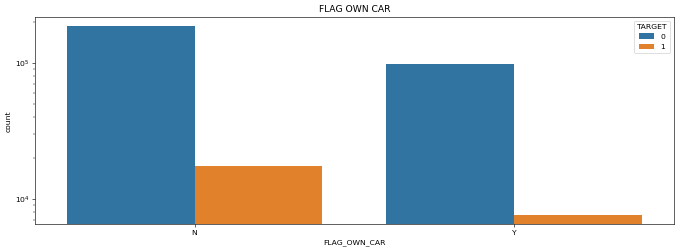

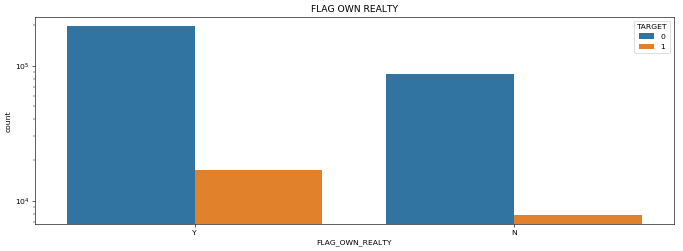

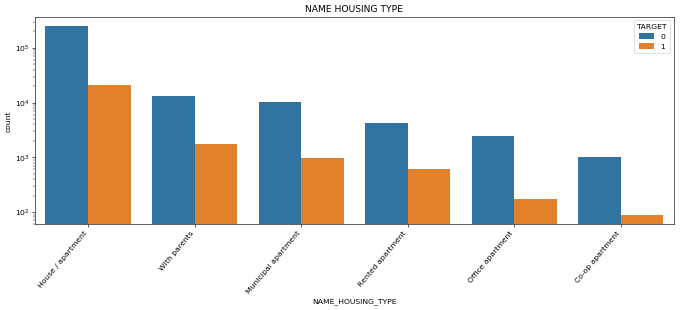

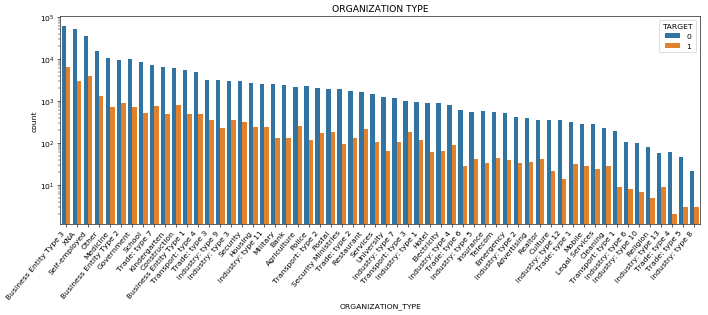

In [23]:
# using countplots for bivariate analysis of categorical variables w.r.t the TARGET variable

for i in cat_var:
    
    # set figure size for larger figure
    plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')
    
    # count plot
    ax = sns.countplot(x=App_EDA_df[i], data=App_EDA_df, hue='TARGET', order=App_EDA_df[i].value_counts().index)

    if len(App_EDA_df[i].unique()) > 2:
        
        # rotate and align the tick labels to look better
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

    # set title
    ax.set_title(' '.join([x for x in i.split('_')]))
        
    # changing to a logarithmic scale so that the range can fit into the size of the plot.
    plt.yscale('log')

    # show plot
    plt.show()

<font color = purple> Given the large number of unique values for `ORGANIZATION_TYPE` column, it made for a rather "noisy" plot and we did not feel we could derive any meaningful insights from this variable especially since we have `NAME_INCOME_TYPE` and `OCCUPATION_TYPE` columns to work with. Hence, we elected to drop the `ORGANIZATION_TYPE` column.</font>

In [24]:
App_EDA_df.drop(['ORGANIZATION_TYPE'], axis=1, inplace=True)

### Checking contiuous (quantitative) variables for outliers

In [25]:
# Creating list of columns: 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_MON'

amt_cols = [col for col in App_EDA_df.columns if 'AMT_' in col]

# Since EXT_SOURCE_2 column is a continuous variable as well, adding it to the amt_cols

amt_cols.append('EXT_SOURCE_2')

con_var = amt_cols.copy()

print(con_var)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_MON', 'EXT_SOURCE_2']


In [26]:
# Looping through each value of the con_var list

for i in con_var:

    Q1 = App_EDA_df[i].quantile(0.25)        # taking the value of first quantile for each column
    Q3 = App_EDA_df[i].quantile(0.75)        # taking the value of third quantile for eah column

    IQR = Q3 - Q1                            # finding the inter-quartile range

    lower_fence = Q1 - 1.5*IQR               # calculating the lower fence
    upper_fence = Q3 + 1.5*IQR               # calculating the upper fence

    # Capturing all the values lower than the lower fence and higher than the upper fence
    outliers = (App_EDA_df[i] < lower_fence) | (App_EDA_df[i] > upper_fence)
    
    print(' '.join([x for x in i.split('_')]))        # setting the title of the column
    print(outliers.value_counts(), end='\n\n')        # printing the outlier value count for the column

AMT INCOME TOTAL
False    293476
True      14035
Name: AMT_INCOME_TOTAL, dtype: int64

AMT CREDIT
False    300949
True       6562
Name: AMT_CREDIT, dtype: int64

AMT ANNUITY
False    300007
True       7504
Name: AMT_ANNUITY, dtype: int64

AMT GOODS PRICE
False    292783
True      14728
Name: AMT_GOODS_PRICE, dtype: int64

AMT REQ CREDIT BUREAU MON
False    263752
True      43759
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

EXT SOURCE 2
False    307511
Name: EXT_SOURCE_2, dtype: int64



### Univariate analysis of continuous (quantitative) variables using boxplots after capping outliers via the `IQR` method

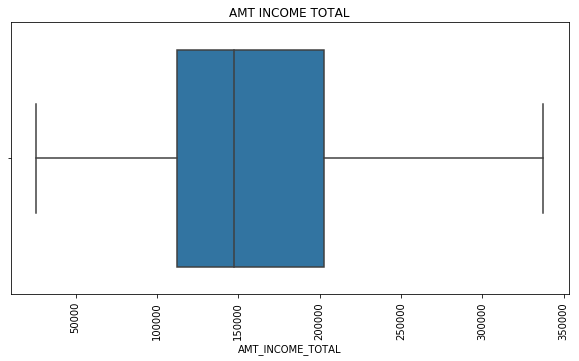

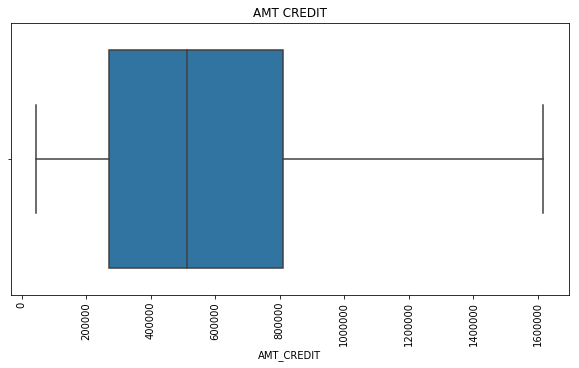

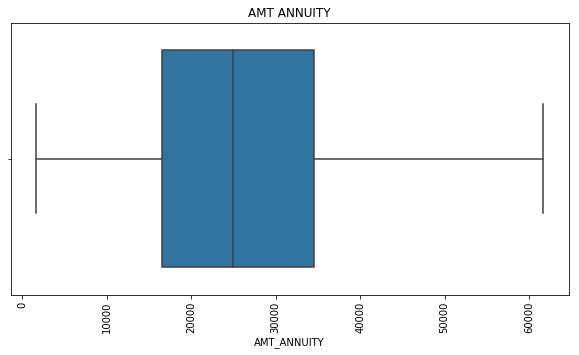

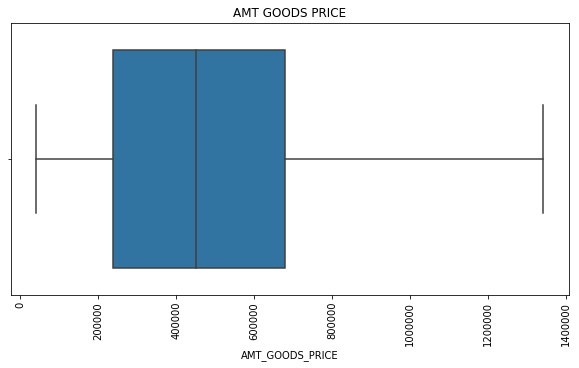

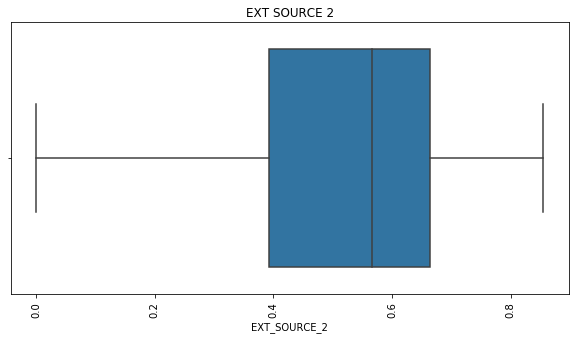

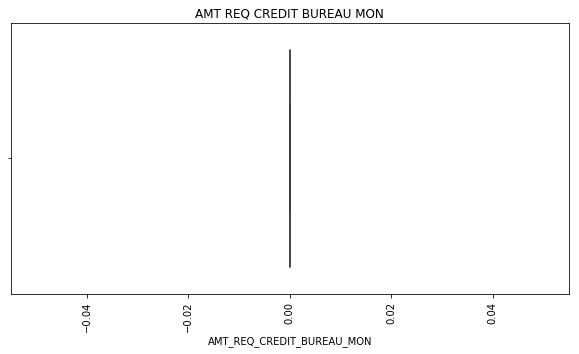

In [27]:
# Looping through each column of App_EDA_df

for i in App_EDA_df.columns:
    
    # Checking if that column exists inside our amount columns
    if i in con_var:
        Q1 = App_EDA_df[i].quantile(0.25)        # taking the value of first quantile for each column
        Q3 = App_EDA_df[i].quantile(0.75)        # taking the value of third quantile for eah column

        IQR = Q3 - Q1                            # finding the inter-quartile range
    
        lower_fence = Q1 - 1.5*IQR               # calculating the lower fence
        upper_fence = Q3 + 1.5*IQR               # calculating the upper fence
        
        # Replacing all the values lower than the lower fence with the value of lower fence
        App_EDA_df[i][App_EDA_df[i] <= lower_fence] = lower_fence 
        
        # Replacing all the values lower than the lower fence with the value of lower fence
        App_EDA_df[i][App_EDA_df[i] >= upper_fence] = upper_fence
    
        plt.figure(1, figsize=(10,5))                             # adjusting the image size
        sns.boxplot(App_EDA_df[i])                                # creating a box plot for each individual column
        plt.xticks(rotation=90, fontsize=10)                      # rotating the x-axis labels 
        plt.title(' '.join([x for x in i.split('_')]))            # setting the title of the plot       
        plt.show()                                                # displaying the plot

In [28]:
# Inspecting the capped values for 'AMT_REQ_CREDIT_BUREAU_MON'

Q1 = App_EDA_df['AMT_REQ_CREDIT_BUREAU_MON'].quantile(0.25)                # calculating the first quantile
Q3 = App_EDA_df['AMT_REQ_CREDIT_BUREAU_MON'].quantile(0.75)                # calculating the third quantile

IQR = Q3 - Q1                                                              # calculating the inter quantile range
    
lower_fence = Q1 - 1.5*IQR                                                 # calculating the lower fence value
upper_fence = Q3 + 1.5*IQR                                                 # calculating the upper fence value

print(Q1,Q3)
print(IQR)
print(lower_fence,upper_fence)

0.0 0.0
0.0
0.0 0.0


<font color = purple> It's clear that there are more instances of `0` enquiries to the Credit Bureau about the client one month before application than all other instances combined. So we elected to drop this column.</font>

In [29]:
# Dropping 'AMT_REQ_CREDIT_BUREAU_MON' from App_EDA_df

App_EDA_df.drop('AMT_REQ_CREDIT_BUREAU_MON', axis=1, inplace=True)

### Segmented univariate analysis of continuous (quantitative) variables

##### Total Income

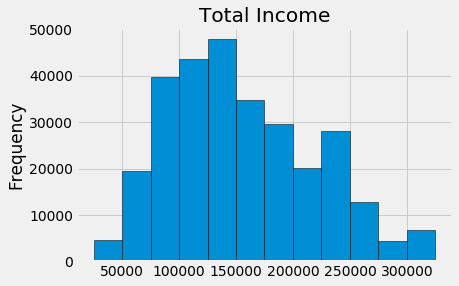

In [30]:
# Styling the histogram
plt.style.use('fivethirtyeight')

# Plotting the histogram with binned ranges from 25000-340000 by width of 25000
plt.hist(App_EDA_df['AMT_INCOME_TOTAL'], bins=range(25000, 340000, 25000), edgecolor='black')

# Adding Frequency as label for y-axis
plt.ylabel('Frequency')
# Adding title of the plot as Total Income
plt.title('Total Income')
plt.show()

##### Loan Amount

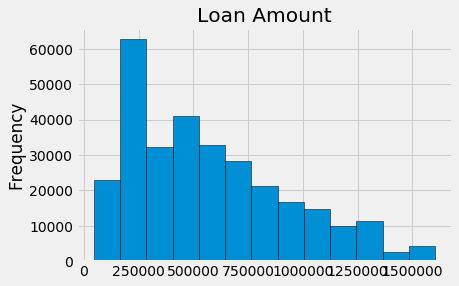

In [31]:
# Styling the histogram
plt.style.use('fivethirtyeight')

# Plotting the histogram with binned ranges from 45000-1620000 by width of 120000
plt.hist(App_EDA_df['AMT_CREDIT'], bins=range(45000, 1620000, 120000), edgecolor='black')

# Adding Frequency as label for y-axis
plt.ylabel('Frequency')
# Adding title of the plot as Total Income
plt.title('Loan Amount')
plt.show()

##### Annuity

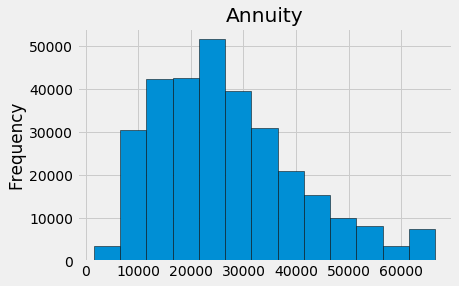

In [32]:
# Styling the histogram
plt.style.use('fivethirtyeight')

# Plotting the histogram with binned ranges from 1500-70000 by width of 5000
plt.hist(App_EDA_df['AMT_ANNUITY'], bins=range(1500, 70000, 5000), edgecolor='black')

# Adding Frequency as label for y-axis
plt.ylabel('Frequency')
# Adding title of the plot as Annuity
plt.title('Annuity')
plt.show()

##### Price of Goods for Loan

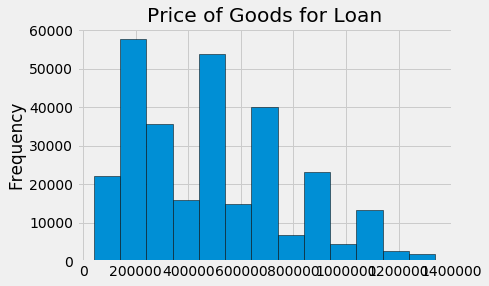

In [33]:
# Styling the histogram
plt.style.use('fivethirtyeight')

# Plotting the histogram with binned ranges from 40000-1400000 by width of 100000
plt.hist(App_EDA_df['AMT_GOODS_PRICE'], bins=range(40000, 1400000, 100000), edgecolor='black')

# Adding Frequency as label for y-axis
plt.ylabel('Frequency')
# Adding title of the plot as Price of Goods for Loan
plt.title('Price of Goods for Loan')
plt.show()

#### EXT_SOURCE_2

In [34]:
# Scaling up the EXT_SOURCE_2 values since they lie between 0 and 1
App_EDA_df['EXT_SOURCE_2'] = App_EDA_df['EXT_SOURCE_2'].apply(lambda x: x*100)
App_EDA_df['EXT_SOURCE_2'].max(), App_EDA_df['EXT_SOURCE_2'].min()

(85.49996664047012, 8.173616518884397e-06)

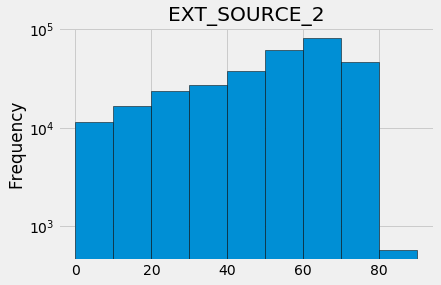

In [35]:
# Styling the plot
plt.style.use('fivethirtyeight')

# Plotting the histogram with binned ranges of 0-100 and width 10
plt.hist(App_EDA_df['EXT_SOURCE_2'], bins=range(0, 100, 10), edgecolor='black', log=True)

# Setting the y-axis label as Frequency
plt.ylabel('Frequency')
# Setting title as EXT_SOURCE_2
plt.title('EXT_SOURCE_2')
plt.show()

### Univariate analysis of discrete variables via frequency distribution of unique values

In [36]:
# creating a list of discrete variables from App_EDA_df

dis_var = [col for col in App_EDA_df.columns if col not in con_var and col not in cat_var]
dis_var

['TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [37]:
# retrieving frequency distribution for the discrete variables' unique values

for i in dis_var:
    print(App_EDA_df[i].value_counts().to_frame(), end='\n\n')

   TARGET
0  282686
1   24825

    CNT_CHILDREN
0         215371
1          61119
2          26749
3           3717
4            429
5             84
6             21
7              7
14             3
19             2
12             2
10             2
9              2
8              2
11             1

        DAYS_BIRTH
-13749          43
-13481          42
-18248          41
-10020          41
-15771          40
-10292          40
-14395          39
-14267          39
-13263          39
-11664          39
-13584          38
-15565          38
-13788          38
-13480          38
-15042          38
-13634          38
-13891          38
-14791          38
-13217          37
-15450          37
-10136          37
-20074          37
-15048          37
-16690          37
-10107          37
-15563          37
-14790          37
-14767          37
-10192          37
-14890          37
-16257          37
-12806          37
-11108          37
-14276          37
-13706          36
-13904      

         DAYS_LAST_PHONE_CHANGE
 0.0                      37672
-1.0                       2812
-2.0                       2318
-3.0                       1763
-4.0                       1285
-5.0                        824
-6.0                        537
-7.0                        442
-8.0                        278
-476.0                      222
-352.0                      213
-392.0                      211
-364.0                      209
-479.0                      204
-329.0                      203
-358.0                      203
-293.0                      202
-350.0                      201
-399.0                      200
-441.0                      200
-404.0                      199
-463.0                      198
-9.0                        198
-11.0                       198
-301.0                      197
-496.0                      195
-362.0                      195
-304.0                      195
-483.0                      195
-308.0                      195
-355.0  

#### Determing the imbalance ratio for `TARGET`

In [38]:
# Checking for data imbalance percentage for the 'TARGET' column

App_EDA_df['TARGET'].sum() * 100 / len(App_EDA_df)

8.072881945686495

<font color = purple> Insight: `8%` of people applying for loans have been late on their payments at least once.</font>

#### Target

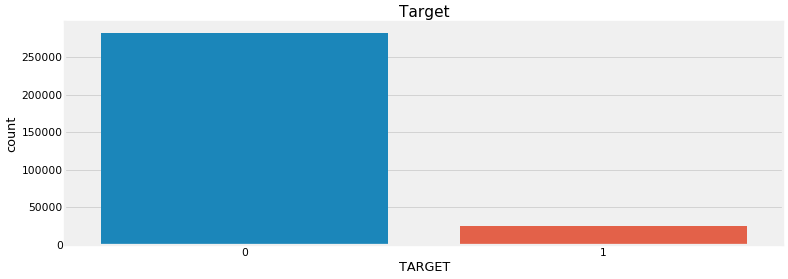

In [39]:

# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['TARGET'], data=App_EDA_df, 
                   order=App_EDA_df['TARGET'].value_counts().index)

# set title
ax.set_title('Target')

# show plot
plt.show()

##### Count of Children

In [40]:
# Checking the max and min values of CNT_CHILDREN
App_EDA_df['CNT_CHILDREN'].max(), App_EDA_df['CNT_CHILDREN'].min()

(19, 0)

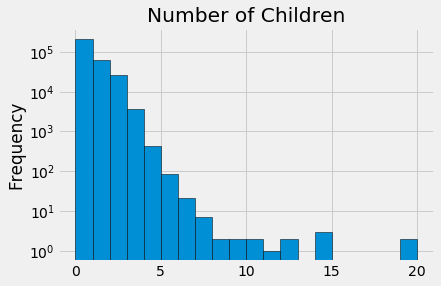

In [41]:
# Styling the plot
plt.style.use('fivethirtyeight')

# Plotting the histogram with binned ranges of 0-21 and width as 1
plt.hist(App_EDA_df['CNT_CHILDREN'], bins=range(0, 21, 1), edgecolor='black', log=True)

# Setting the y-axis label as Frequency
plt.ylabel('Frequency')
# Setting the title as Number of Children
plt.title('Number of Children')
plt.show()

##### Age of the applicant

In [42]:
# Dividing the column DAYS_BIRTH by -365 to get the age of the the applicant 
App_EDA_df['DAYS_BIRTH'] = App_EDA_df['DAYS_BIRTH'].apply(lambda x: x/-365)

# Renaming the column DAYS_BIRTH to AGE
App_EDA_df.rename(columns = {'DAYS_BIRTH':'AGE'}, inplace = True)

In [43]:
# Checking the max and min values of Age column
App_EDA_df['AGE'].max(), App_EDA_df['AGE'].min()

(69.12054794520547, 20.517808219178082)

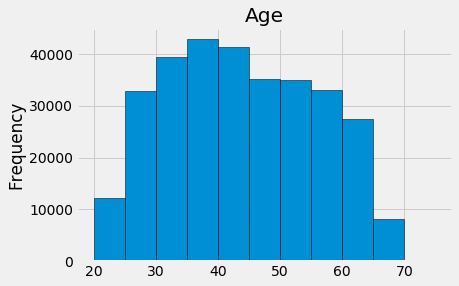

In [44]:
# Styling the plot
plt.style.use('fivethirtyeight')

# Plotting the histogram with binned ranges of 20-80 and width as 5
plt.hist(App_EDA_df['AGE'], bins=range(20, 80, 5), edgecolor='black')
# Setting the y-axis label as Frequency
plt.ylabel('Frequency')
# Setting the title as Age
plt.title('Age')
plt.show()

`Note:` <font color = purple> While we identified `DAYS_BIRTH` as a discrete variable on account of the values given in days, we acknowledge `AGE` as a continuous variable after our calculation to convert the values to years and repurpose them for our analysis. </font>

##### Years Employed

In [45]:
# Checking the value counts of days employed for the applicant
App_EDA_df['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
-348         125
-241         124
-745         123
-137         123
-139         122
-382         122
-238         122
-198         122
-240         120
-205         120
-191         120
-218         120
-223         119
-225         119
-118         119
-430         118
-227         118
-244         118
-181         118
-370         117
-132         117
-115         117
-228         117
-133         117
-268         117
-129         116
-204         116
-119         116
-208         1

In [46]:
# Checking the value counts for DAYS_EMPLOYED==365243
App_EDA_df['NAME_INCOME_TYPE'][App_EDA_df['DAYS_EMPLOYED']==365243].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

<font color = purple> This confirms that `DAYS_EMPLOYED` having a value of `365243` actually represents largely `Pensioners` and therefore this data cannot be discounted. So we decided to treat this column appropriately.</font>

In [47]:
# Replacing the value of 365243 by -20000 to facilitate including these 55374 records in the plot
App_EDA_df['DAYS_EMPLOYED'].replace(365243, -20000, inplace=True)

In [48]:
# Dividing the column DAYS_EMPLOYED by -365 to get the years employed of the applicant
App_EDA_df['DAYS_EMPLOYED'] = App_EDA_df['DAYS_EMPLOYED'].apply(lambda x: x/-365)

# Renaming the column DAYS_EMPLOYED to YEARS_EMPLOYED
App_EDA_df.rename(columns = {'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace = True)

In [49]:
# Checking the max and min values of YEARS_EMPLOYED
App_EDA_df['YEARS_EMPLOYED'].max(), App_EDA_df['YEARS_EMPLOYED'].min()

(54.794520547945204, -0.0)

In [50]:
# Given the min value displays -0.0, we'll treat it appropriately to make it positive
App_EDA_df['YEARS_EMPLOYED'] = App_EDA_df['YEARS_EMPLOYED'].abs()
App_EDA_df['YEARS_EMPLOYED'].max(), App_EDA_df['YEARS_EMPLOYED'].min()

(54.794520547945204, 0.0)

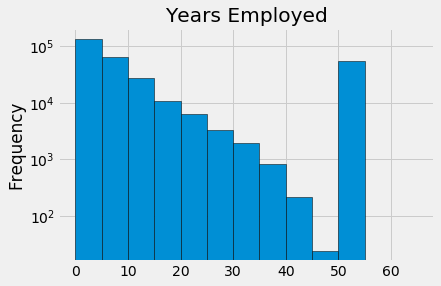

In [51]:
# Styling the graph
plt.style.use('fivethirtyeight')

# Plotting the histogram with binned ranges from 0-70 and width as 5
plt.hist(App_EDA_df['YEARS_EMPLOYED'], bins=range(0, 70, 5), edgecolor='black', log=True)

# Assigning title to the y-axis as Frequency
plt.ylabel('Frequency')
# Assigning title as Years Employed
plt.title('Years Employed')
plt.show()

`Note:` <font color = purple> While we identified `DAYS_EMPLOYED` as a discrete variable on account of the values given in days, we acknowledge `YEARS_EMPLOYED` as a continuous variable after our calculation to convert the values to years and repurpose them for our analysis. </font>

##### Years since ID Change

In [52]:
# Dividing the column DAYS_EMPLOYED by -365 to get the years since applicant last changed their ID
App_EDA_df['DAYS_ID_PUBLISH'] = App_EDA_df['DAYS_ID_PUBLISH'].apply(lambda x: x/-365)

# Renaming the column to YEARS_EMPLOYED
App_EDA_df.rename(columns = {'DAYS_ID_PUBLISH':'YEARS_SINCE_ID_CHANGE'}, inplace = True)

In [53]:
# Determing the max and min values of column YEARS_SINCE_ID_CHANGE
App_EDA_df['YEARS_SINCE_ID_CHANGE'].max(), App_EDA_df['YEARS_SINCE_ID_CHANGE'].min()

(19.71780821917808, -0.0)

In [54]:
# Given the min value displays -0.0, we'll treat it appropriately to make it positive
App_EDA_df['YEARS_SINCE_ID_CHANGE'] = App_EDA_df['YEARS_SINCE_ID_CHANGE'].abs()
App_EDA_df['YEARS_SINCE_ID_CHANGE'].max(), App_EDA_df['YEARS_SINCE_ID_CHANGE'].min()

(19.71780821917808, 0.0)

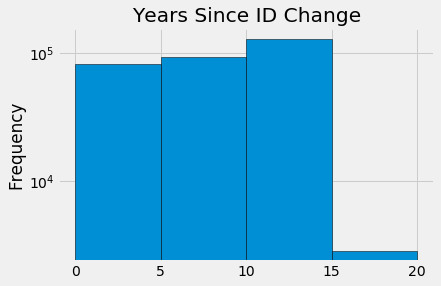

In [55]:
# Styling the graph
plt.style.use('fivethirtyeight')

# Plotting the histogram with required binned ranges of 0-25 and width as 5
plt.hist(App_EDA_df['YEARS_SINCE_ID_CHANGE'], bins=range(0, 25, 5), edgecolor='black', log=True)

# Setting y-axis label as Frequency
plt.ylabel('Frequency')
# Setting title as Years Since ID Change
plt.title('Years Since ID Change')
plt.show()

`Note:` <font color = purple> While we identified `DAYS_ID_PUBLISH` as a discrete variable on account of the values given in days, we acknowledge `YEARS_SINCE_ID_CHANGE` as a continuous variable after our calculation to convert the values to years and repurpose them for our analysis. </font>

##### Years Since Phone Change

In [56]:
# Dividing the column DAYS_LAST_PHONE_CHANGE by -365 to get the time in years since applicant changed their phone
App_EDA_df['DAYS_LAST_PHONE_CHANGE'] = App_EDA_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: x/-365)

# Renaming the column DAYS_LAST_PHONE_CHANGE to YEARS_SINCE_PHONE_CHANGE
App_EDA_df.rename(columns = {'DAYS_LAST_PHONE_CHANGE':'YEARS_SINCE_PHONE_CHANGE'}, inplace = True)

In [57]:
# Determing the max and min values of column YEARS_SINCE_PHONE_CHANGE
App_EDA_df['YEARS_SINCE_PHONE_CHANGE'].max(), App_EDA_df['YEARS_SINCE_PHONE_CHANGE'].min()

(11.758904109589041, -0.0)

In [58]:
# Given the min value displays -0.0, we'll treat it appropriately to make it positive
App_EDA_df['YEARS_SINCE_PHONE_CHANGE'] = App_EDA_df['YEARS_SINCE_PHONE_CHANGE'].abs()
App_EDA_df['YEARS_SINCE_PHONE_CHANGE'].max(), App_EDA_df['YEARS_SINCE_PHONE_CHANGE'].min()

(11.758904109589041, 0.0)

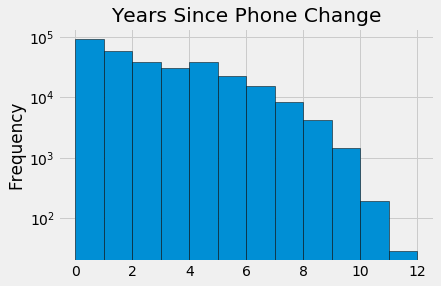

In [59]:
# Styling the plot
plt.style.use('fivethirtyeight')

# Plotting the histogram with binned ranges of 0-13 and width as 1
plt.hist(App_EDA_df['YEARS_SINCE_PHONE_CHANGE'], bins=range(0, 13, 1), edgecolor='black', log=True)

# Setting the y-axis label as Frequency
plt.ylabel('Frequency')
# Setting title as Years Since Phone Change
plt.title('Years Since Phone Change')
plt.show()

`Note:` <font color = purple> While we identified `DAYS_LAST_PHONE_CHANGE` as a discrete variable on account of the values given in days, we acknowledge `YEARS_SINCE_PHONE_CHANGE` as a continuous variable after our calculation to convert the values to years and repurpose them for our analysis. </font>

##### Mobile Number Provided

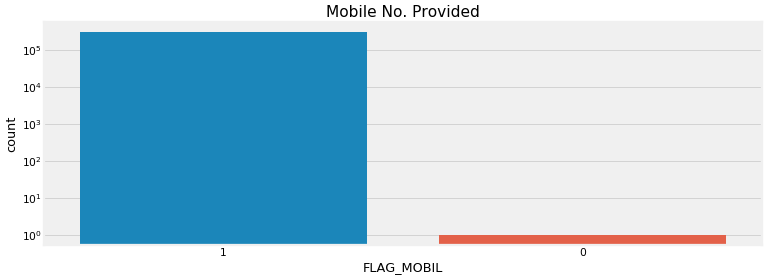

In [60]:
# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['FLAG_MOBIL'], data=App_EDA_df, 
                   order=App_EDA_df['FLAG_MOBIL'].value_counts().index)

# set title
ax.set_title('Mobile No. Provided')

# changing to a logarithmic scale so that the range can fit into the size of the plot.
plt.yscale('log')

# show plot
plt.show()

##### Mobile Phone Reachable

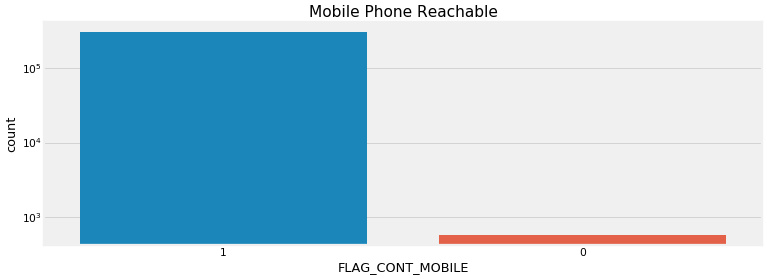

In [61]:
# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['FLAG_CONT_MOBILE'], data=App_EDA_df, 
                   order=App_EDA_df['FLAG_CONT_MOBILE'].value_counts().index)

# set title
ax.set_title('Mobile Phone Reachable')

# changing to a logarithmic scale so that the range can fit into the size of the plot.
plt.yscale('log')

# show plot
plt.show()

##### Observation of client's social surroundings with observable 30 DPD default

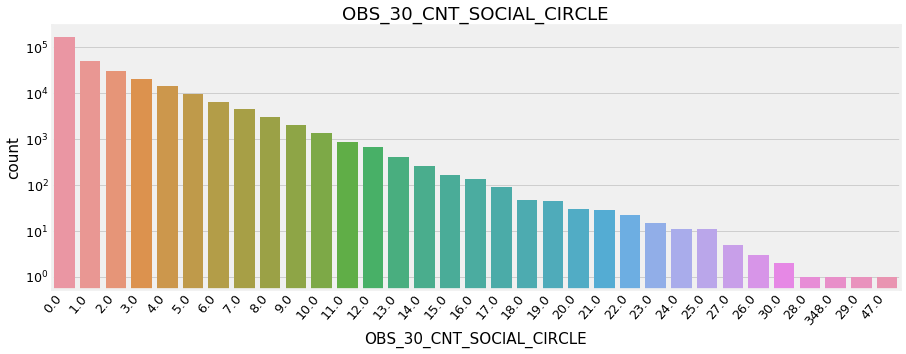

In [62]:
# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=65, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['OBS_30_CNT_SOCIAL_CIRCLE'], data=App_EDA_df, 
                   order=App_EDA_df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts().index)

# rotate and align the tick labels to look better
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

# set title
ax.set_title('OBS_30_CNT_SOCIAL_CIRCLE')

# changing to a logarithmic scale so that the range can fit into the size of the plot.
plt.yscale('log')

# show plot
plt.show()

##### Observation of client's social surroundings defaulted on 30 DPD

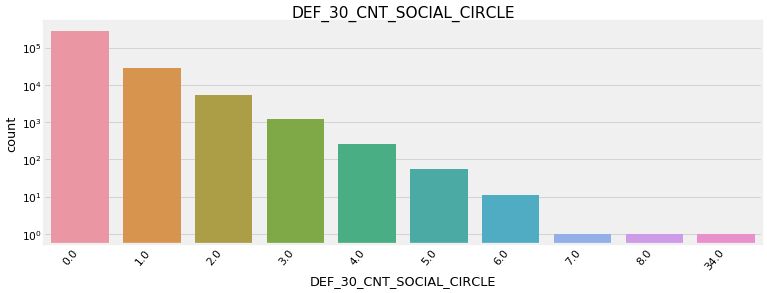

In [63]:

# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['DEF_30_CNT_SOCIAL_CIRCLE'], data=App_EDA_df, 
                   order=App_EDA_df['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts().index)

# rotate and align the tick labels to look better
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

# set title
ax.set_title('DEF_30_CNT_SOCIAL_CIRCLE')

# changing to a logarithmic scale so that the range can fit into the size of the plot.
plt.yscale('log')

# show plot
plt.show()

##### Observation of client's social surroundings with observable 60 DPD default

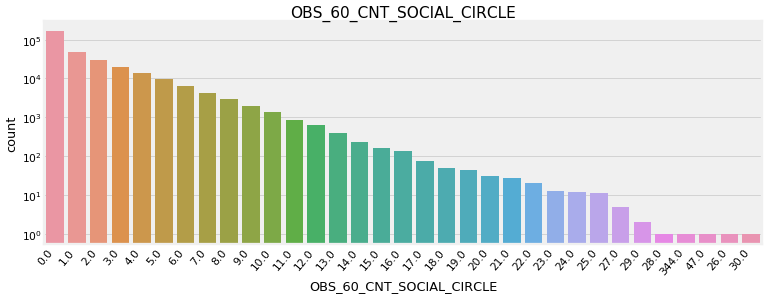

In [64]:

# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['OBS_60_CNT_SOCIAL_CIRCLE'], data=App_EDA_df, 
                   order=App_EDA_df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().index)

# rotate and align the tick labels to look better
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

# set title
ax.set_title('OBS_60_CNT_SOCIAL_CIRCLE')

# changing to a logarithmic scale so that the range can fit into the size of the plot.
plt.yscale('log')

# show plot
plt.show()

##### Observation of client's social surroundings defaulted on 60 (days past due) DPD

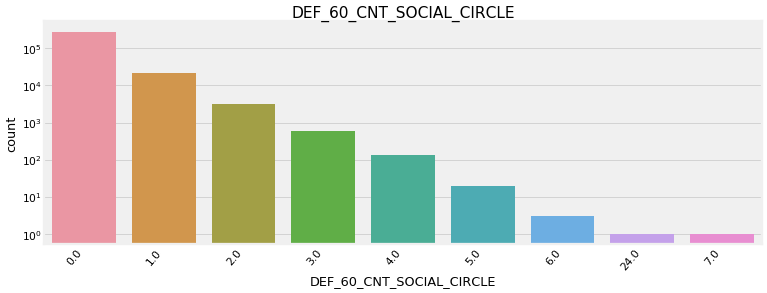

In [65]:

# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['DEF_60_CNT_SOCIAL_CIRCLE'], data=App_EDA_df, 
                   order=App_EDA_df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts().index)

# rotate and align the tick labels to look better
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

# set title
ax.set_title('DEF_60_CNT_SOCIAL_CIRCLE')

# changing to a logarithmic scale so that the range can fit into the size of the plot.
plt.yscale('log')

# show plot
plt.show()

##### Number of Family Members

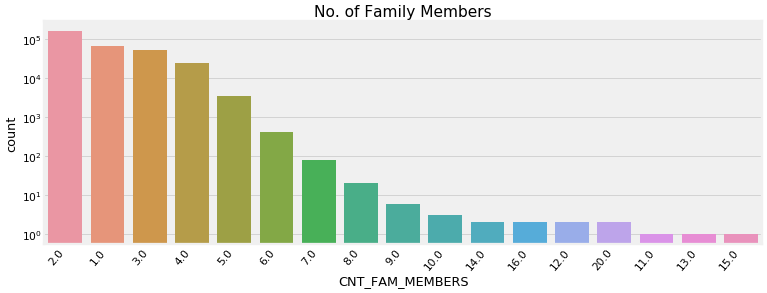

In [66]:

# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['CNT_FAM_MEMBERS'], data=App_EDA_df, 
                   order=App_EDA_df['CNT_FAM_MEMBERS'].value_counts().index)

# rotate and align the tick labels to look better
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

# set title
ax.set_title('No. of Family Members')

# changing to a logarithmic scale so that the range can fit into the size of the plot.
plt.yscale('log')

# show plot
plt.show()

##### Rating of Client's Region

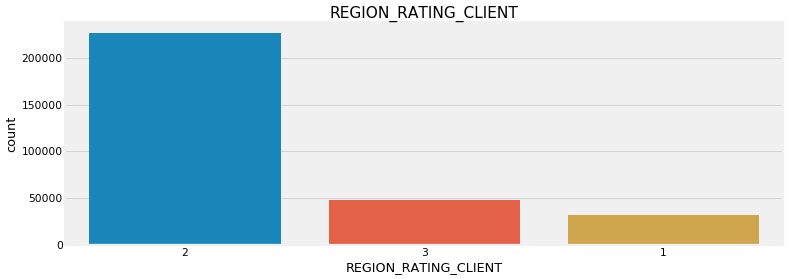

In [67]:

# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['REGION_RATING_CLIENT'], data=App_EDA_df, 
                   order=App_EDA_df['REGION_RATING_CLIENT'].value_counts().index)

# set title
ax.set_title('REGION_RATING_CLIENT')

# show plot
plt.show()

##### Rating of Client's Region w.r.t. City

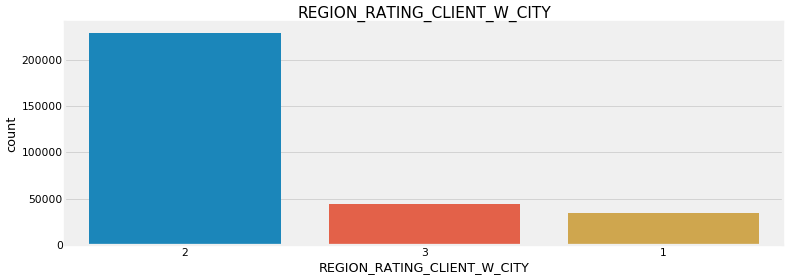

In [68]:

# set figure size for larger figure
plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

# count plot
ax = sns.countplot(x=App_EDA_df['REGION_RATING_CLIENT_W_CITY'], data=App_EDA_df, 
                   order=App_EDA_df['REGION_RATING_CLIENT_W_CITY'].value_counts().index)

# set title
ax.set_title('REGION_RATING_CLIENT_W_CITY')

# show plot
plt.show()

### Bivariate analysis of continuous (quantitative) variables w.r.t `TARGET`

#### Total Income w.r.t Target

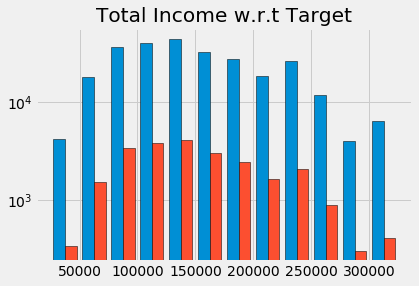

In [69]:
# Taking the dataframe with column AMT_INCOME_TOTAL for Target as 0
x0 = App_EDA_df['AMT_INCOME_TOTAL'][App_EDA_df['TARGET']==0]

# Taking the dataframe with column AMT_INCOME_TOTAL for Target as 1
x1 = App_EDA_df['AMT_INCOME_TOTAL'][App_EDA_df['TARGET']==1]

# Stack the data
plt.figure()

# Plotting the histogram with binned ranges from 25000-340000 by width of 25000
plt.hist([x0,x1], bins=range(25000, 340000, 25000), edgecolor='black', log=True)

# Setting the title as Total Income w.r.t Target
plt.title('Total Income w.r.t Target')
plt.show()

#### Loan Amount w.r.t Target

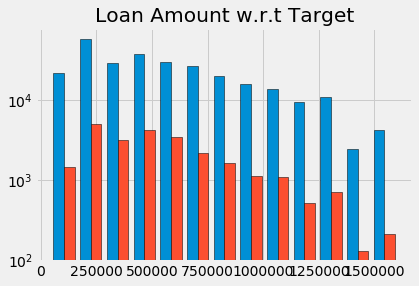

In [70]:
# Taking the dataframe with column AMT_CREDIT for Target as 0
x0 = App_EDA_df['AMT_CREDIT'][App_EDA_df['TARGET']==0]

# Taking the dataframe with column AMT_CREDIT for Target as 1
x1 = App_EDA_df['AMT_CREDIT'][App_EDA_df['TARGET']==1]

# Stack the data
plt.figure()

# Plotting the histogram with binned ranges from 45000-1620000 by width of 120000
plt.hist([x0,x1], bins=range(45000, 1620000, 120000), edgecolor='black', log=True)

# Setting the title as Loan Amount w.r.t Target
plt.title('Loan Amount w.r.t Target')
plt.show()

#### Annuity

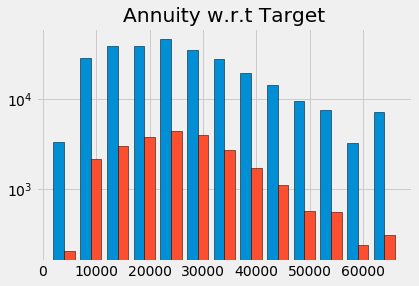

In [71]:
# Taking the dataframe with column AMT_CREDIT for Target as 0
x0 = App_EDA_df['AMT_ANNUITY'][App_EDA_df['TARGET']==0]

# Taking the dataframe with column AMT_CREDIT for Target as 1
x1 = App_EDA_df['AMT_ANNUITY'][App_EDA_df['TARGET']==1]

# Stack the data
plt.figure()

# Plotting the histogram with binned ranges from 1500-70000 by width of 5000
plt.hist([x0,x1], bins=range(1500, 70000, 5000), edgecolor='black', log=True)

# Setting the title as Annuity w.r.t Target
plt.title('Annuity w.r.t Target')
plt.show()

#### Price of Goods for Loan w.r.t Target

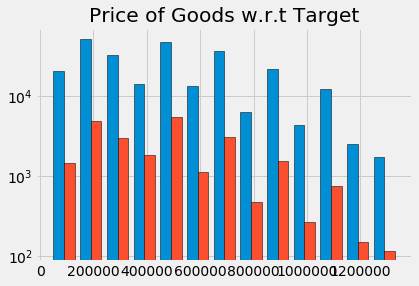

In [72]:
# Taking the dataframe with column AMT_CREDIT for Target as 0
x0 = App_EDA_df['AMT_GOODS_PRICE'][App_EDA_df['TARGET']==0]

# Taking the dataframe with column AMT_CREDIT for Target as 1
x1 = App_EDA_df['AMT_GOODS_PRICE'][App_EDA_df['TARGET']==1]

# Stack the data
plt.figure()

# Plotting the histogram with binned ranges from 40000-1400000 by width of 100000
plt.hist([x0,x1], bins=range(40000, 1400000, 100000), edgecolor='black', log=True)

# Setting the title as Price of Goods w.r.t Target
plt.title('Price of Goods w.r.t Target')
plt.show()

#### EXT_SOURCE_2 w.r.t Target

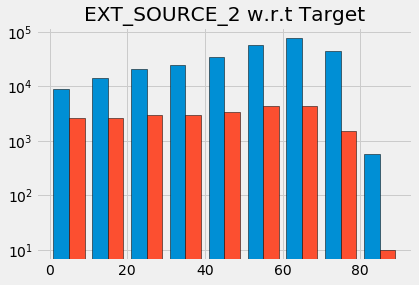

In [73]:
# Taking the dataframe with column EXT_SOURCE_2 for Target as 0
x0 = App_EDA_df['EXT_SOURCE_2'][App_EDA_df['TARGET']==0]

# Taking the dataframe with column EXT_SOURCE_2 for Target as 1
x1 = App_EDA_df['EXT_SOURCE_2'][App_EDA_df['TARGET']==1]

# Stack the data
plt.figure()

# Plotting the histogram with binned ranges from 0-100 by width of 10
plt.hist([x0,x1], bins=range(0, 100, 10), edgecolor='black', log=True)

# Setting the title as EXT_SOURCE_2 w.r.t Target
plt.title('EXT_SOURCE_2 w.r.t Target')
plt.show()

##### Age w.r.t. Target

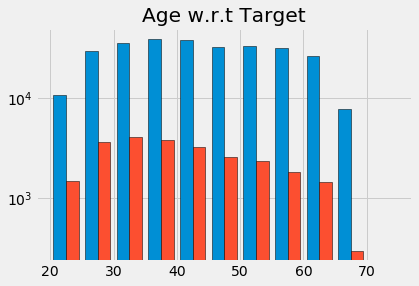

In [74]:
# Taking the dataframe with column Age for Target as 0
x0 = App_EDA_df['AGE'][App_EDA_df['TARGET']==0]

# Taking the dataframe with column Age for Target as 1
x1 = App_EDA_df['AGE'][App_EDA_df['TARGET']==1]

# Stack the data
plt.figure()

# Plotting the histogram with binned ranges from 20-80 and width as 5
plt.hist([x0,x1], bins=range(20, 80, 5), edgecolor='black', log=True)

# Setting the title as Age w.r.t Target
plt.title('Age w.r.t Target')
plt.show()

##### Years Employed w.r.t. Target

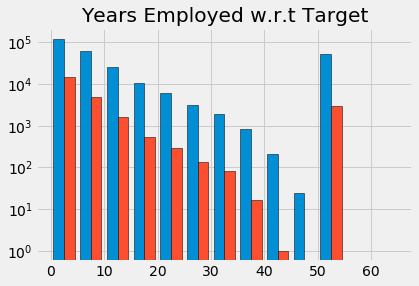

In [75]:
# Taking the dataframe with column Age for Target as 0
x0 = App_EDA_df['YEARS_EMPLOYED'][App_EDA_df['TARGET']==0]

# Taking the dataframe with column Age for Target as 1
x1 = App_EDA_df['YEARS_EMPLOYED'][App_EDA_df['TARGET']==1]

# Stack the data
plt.figure()

# Plotting the histogram with binned ranges from 0-70 and width as 5
plt.hist([x0,x1], bins=range(0, 70, 5), edgecolor='black', log=True)

# Setting the title as Years Employed w.r.t Target
plt.title('Years Employed w.r.t Target')
plt.show()

##### Years since ID Change w.r.t Target

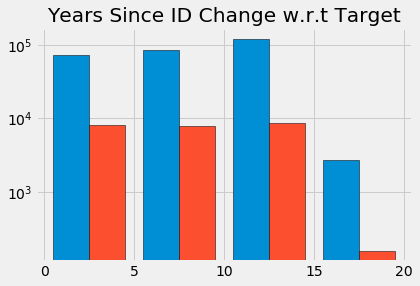

In [76]:
x0 = App_EDA_df['YEARS_SINCE_ID_CHANGE'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['YEARS_SINCE_ID_CHANGE'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(0, 25, 5), edgecolor='black', log=True)
plt.title('Years Since ID Change w.r.t Target')
plt.show()

### Bivariate analysis of discrete (quantitative) variables w.r.t `TARGET`

#### Number of Children w.r.t Target

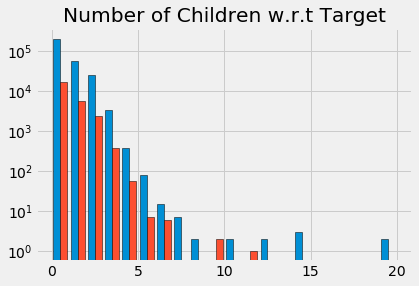

In [77]:
x0 = App_EDA_df['CNT_CHILDREN'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['CNT_CHILDREN'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(0, 21, 1), edgecolor='black', log=True)
plt.title('Number of Children w.r.t Target')
plt.show()

#### Mobile No. Provided w.r.t Target

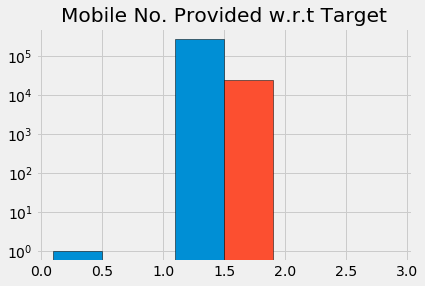

In [78]:
x0 = App_EDA_df['FLAG_MOBIL'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['FLAG_MOBIL'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(0, 4, 1), edgecolor='black', log=True)
plt.title('Mobile No. Provided w.r.t Target')
plt.show()

#### Mobile Phone Reachable w.r.t Target

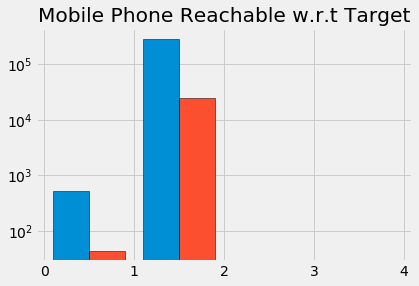

In [79]:
x0 = App_EDA_df['FLAG_CONT_MOBILE'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['FLAG_CONT_MOBILE'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(0, 5, 1), edgecolor='black', log=True)
plt.title('Mobile Phone Reachable w.r.t Target')
plt.show()

#### Observation of client's social surroundings with observable 30 DPD default w.r.t Target

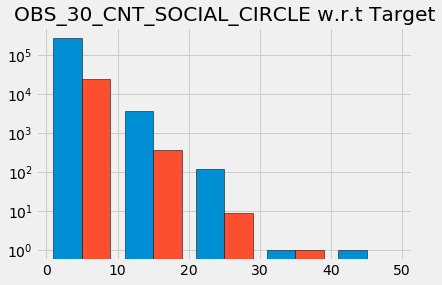

In [80]:
x0 = App_EDA_df['OBS_30_CNT_SOCIAL_CIRCLE'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['OBS_30_CNT_SOCIAL_CIRCLE'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(0, 55, 10), edgecolor='black', log=True)
plt.title('OBS_30_CNT_SOCIAL_CIRCLE w.r.t Target')
plt.show()

<font color = purple> We decided to ignore the one outlier value of `348` for `OBS_30_CNT_SOCIAL_CIRCLE` so the plot could provide better insight.</font>

#### Observation of client's social surroundings defaulted on 30 DPD

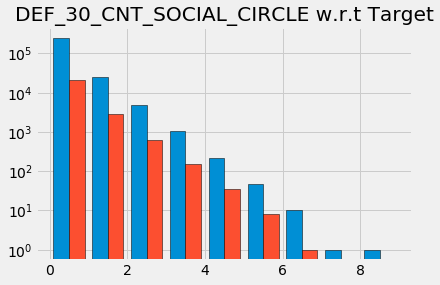

In [81]:
x0 = App_EDA_df['DEF_30_CNT_SOCIAL_CIRCLE'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['DEF_30_CNT_SOCIAL_CIRCLE'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(0, 10, 1), edgecolor='black', log=True)
plt.title('DEF_30_CNT_SOCIAL_CIRCLE w.r.t Target')
plt.show()

<font color = purple> We decided to ignore the one outlier value of `34` for `DEF_30_CNT_SOCIAL_CIRCLE` so the plot could provide better insight.</font>

#### Observation of client's social surroundings with observable 60 DPD default

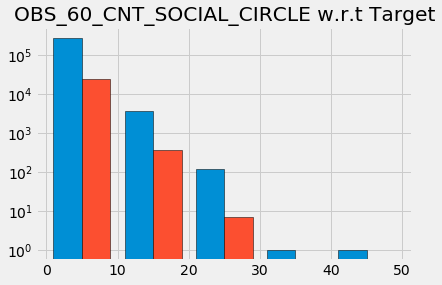

In [82]:
x0 = App_EDA_df['OBS_60_CNT_SOCIAL_CIRCLE'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['OBS_60_CNT_SOCIAL_CIRCLE'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(0, 55, 10), edgecolor='black', log=True)
plt.title('OBS_60_CNT_SOCIAL_CIRCLE w.r.t Target')
plt.show()

<font color = purple> We decided to ignore the one outlier value of `344` for `OBS_60_CNT_SOCIAL_CIRCLE` so the plot could provide better insight.</font>

#### Observation of client's social surroundings defaulted on 60 (days past due) DPD

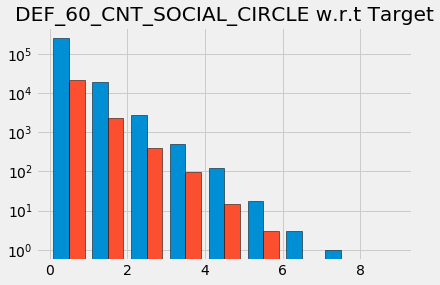

In [83]:
x0 = App_EDA_df['DEF_60_CNT_SOCIAL_CIRCLE'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['DEF_60_CNT_SOCIAL_CIRCLE'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(0, 10, 1), edgecolor='black', log=True)
plt.title('DEF_60_CNT_SOCIAL_CIRCLE w.r.t Target')
plt.show()

<font color = purple> We decided to ignore the one outlier value of `24` for `DEF_60_CNT_SOCIAL_CIRCLE` so the plot could provide better insight.</font>

#### No. of Family Members w.r.t Target

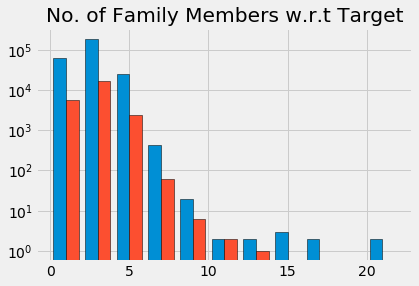

In [84]:
x0 = App_EDA_df['CNT_FAM_MEMBERS'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['CNT_FAM_MEMBERS'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(0, 24, 2), edgecolor='black', log=True)
plt.title('No. of Family Members w.r.t Target')
plt.show()

#### REGION_RATING_CLIENT w.r.t Target

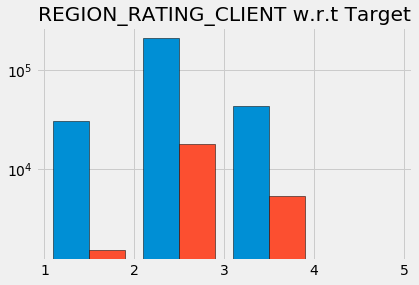

In [85]:
x0 = App_EDA_df['REGION_RATING_CLIENT'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['REGION_RATING_CLIENT'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(1, 6, 1), edgecolor='black', log=True)
plt.title('REGION_RATING_CLIENT w.r.t Target')
plt.show()

#### REGION_RATING_CLIENT_W_CITY w.r.t Target

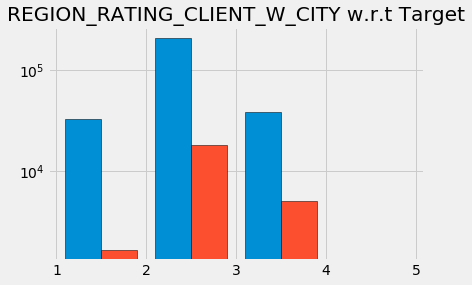

In [86]:
x0 = App_EDA_df['REGION_RATING_CLIENT_W_CITY'][App_EDA_df['TARGET']==0]
x1 = App_EDA_df['REGION_RATING_CLIENT_W_CITY'][App_EDA_df['TARGET']==1]

plt.figure()
plt.hist([x0,x1], bins=range(1, 6, 1), edgecolor='black', log=True)
plt.title('REGION_RATING_CLIENT_W_CITY w.r.t Target')
plt.show()

### Importing the `previous_application` dataset

In [87]:
# Reading data for the previous_application  file
path = r'C:\upGrad\Group Case Study 1'
previous_application_df = pd.read_csv(path+'\\previous_application.csv')

In [88]:
# Inspecting the previous_application_df dataframe
previous_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# Make sure that number of duplicate rows are zero
sum(previous_application_df.duplicated(subset = "SK_ID_PREV")) == 0

True

In [90]:
# Checking the information of previous_application_df
previous_application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [91]:
# Describing the statistical parameters of previous_application_df
previous_application_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [92]:
# Determing the number of rows and columns in file
previous_application_df.shape

(1670214, 37)

In [93]:
# Viewing the columns in previous_application_df
previous_application_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

#### Check for NA values in dataset

In [94]:
print (previous_application_df.isnull().sum())  
print (previous_application_df.isnull().values.any())
print (previous_application_df.isnull().values.sum())

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### checking the % NAs columnwise

In [95]:
previous_application_df.isnull().sum() * 100 / len(previous_application_df)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Creating a new dataframe from the original 'previous_application' dataframe selecting only some of the columns for purpose of EDA

In [96]:
Prev_EDA_df = previous_application_df[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION',
                                       'AMT_CREDIT','AMT_GOODS_PRICE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS',
                                       'NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                                       'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']].set_index('SK_ID_PREV', inplace = False)
Prev_EDA_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
SK_ID_PREV,,,,,,,,,,,,,,
2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,Connectivity,middle
2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA,XAP,Repeater,XNA,XNA,low_action
2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,XNA,high
2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,XNA,middle
1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,XNA,high


In [97]:
# Checking the information of the entire dataframe
Prev_EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 2030495 to 2418762
Data columns (total 14 columns):
SK_ID_CURR                1670214 non-null int64
NAME_CONTRACT_TYPE        1670214 non-null object
AMT_ANNUITY               1297979 non-null float64
AMT_APPLICATION           1670214 non-null float64
AMT_CREDIT                1670213 non-null float64
AMT_GOODS_PRICE           1284699 non-null float64
NAME_CASH_LOAN_PURPOSE    1670214 non-null object
NAME_CONTRACT_STATUS      1670214 non-null object
NAME_PAYMENT_TYPE         1670214 non-null object
CODE_REJECT_REASON        1670214 non-null object
NAME_CLIENT_TYPE          1670214 non-null object
NAME_GOODS_CATEGORY       1670214 non-null object
NAME_SELLER_INDUSTRY      1670214 non-null object
NAME_YIELD_GROUP          1670214 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 191.1+ MB


In [98]:
# Describing the statistical parameters of Prev_EDA_df
Prev_EDA_df.describe()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
count,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06
mean,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05
std,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05
min,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04
50%,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05
75%,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05
max,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06


In [99]:
# Checking the number of rows and columns in Prev_EDA_df
Prev_EDA_df.shape

(1670214, 14)

In [100]:
# Viewing all the columns in dataframe App_EDA_df
Prev_EDA_df.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP'],
      dtype='object')

#### Check for NA values in dataset

In [101]:
print (Prev_EDA_df.isnull().sum())  
print (Prev_EDA_df.isnull().values.any())
print (Prev_EDA_df.isnull().values.sum())

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64
True
757751


#### checking the % NAs columnwise

In [102]:
Prev_EDA_df.isnull().sum() * 100 / len(Prev_EDA_df)

SK_ID_CURR                 0.000000
NAME_CONTRACT_TYPE         0.000000
AMT_ANNUITY               22.286665
AMT_APPLICATION            0.000000
AMT_CREDIT                 0.000060
AMT_GOODS_PRICE           23.081773
NAME_CASH_LOAN_PURPOSE     0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_PAYMENT_TYPE          0.000000
CODE_REJECT_REASON         0.000000
NAME_CLIENT_TYPE           0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_SELLER_INDUSTRY       0.000000
NAME_YIELD_GROUP           0.000000
dtype: float64

### Univariate analysis of unordered categorical variables via frequency distribution of unique values

In [103]:
# creating a list of categorical variables from Prev_EDA_df

prev_cat_var = [col for col in Prev_EDA_df.columns if Prev_EDA_df[col].dtypes=='object']
prev_cat_var

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

In [104]:
# retrieving frequency distribution for the categorical variables' unique values

for i in prev_cat_var:
    print(Prev_EDA_df[i].value_counts().to_frame(), end='\n\n')

                 NAME_CONTRACT_TYPE
Cash loans                   747553
Consumer loans               729151
Revolving loans              193164
XNA                             346

                                  NAME_CASH_LOAN_PURPOSE
XAP                                               922661
XNA                                               677918
Repairs                                            23765
Other                                              15608
Urgent needs                                        8412
Buying a used car                                   2888
Building a house or an annex                        2693
Everyday expenses                                   2416
Medicine                                            2174
Payments on other loans                             1931
Education                                           1573
Journey                                             1239
Purchase of electronic equipment                    1061
Buying a new car     

<font color = purple> Based on the value counts above, we can see that there are two unique values that are not available in the `App_EDA_df` dataframe. Therefore, we elected to remove these `729,497` records to facilitate our comparison between the two datasets and subsequently, our analysis. </font>

In [105]:
Prev_EDA_df = Prev_EDA_df[(Prev_EDA_df['NAME_CONTRACT_TYPE']=='Cash loans') | (Prev_EDA_df['NAME_CONTRACT_TYPE']=='Revolving loans')]
Prev_EDA_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
SK_ID_PREV,,,,,,,,,,,,,,
2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA,XAP,Repeater,XNA,XNA,low_action
2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,XNA,high
2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,XNA,middle
1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,XNA,high
1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Everyday expenses,Approved,Cash through the bank,XAP,Repeater,XNA,XNA,low_normal


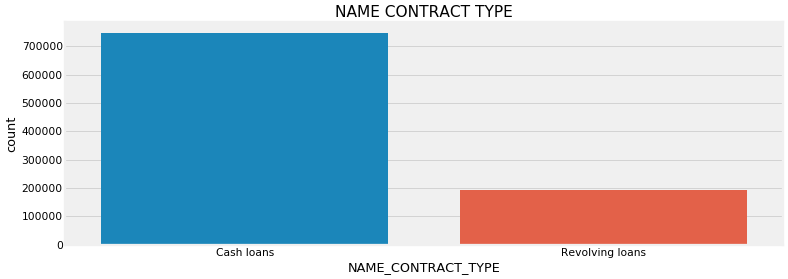

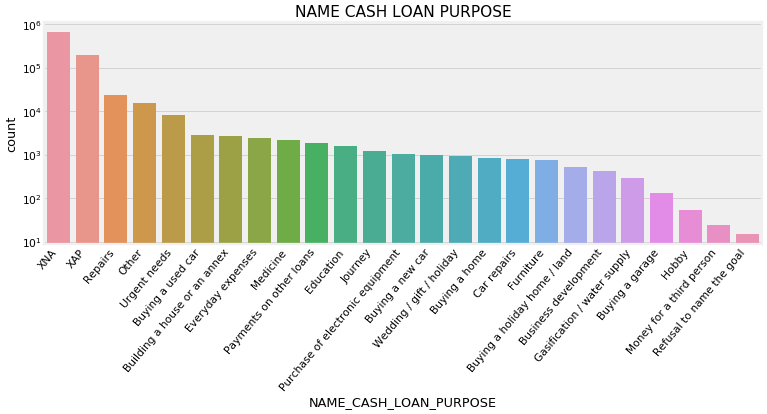

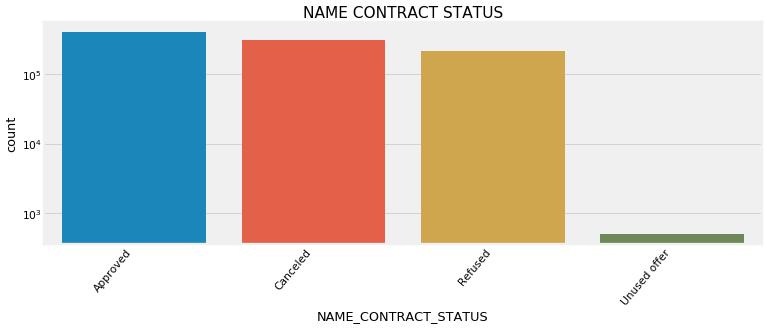

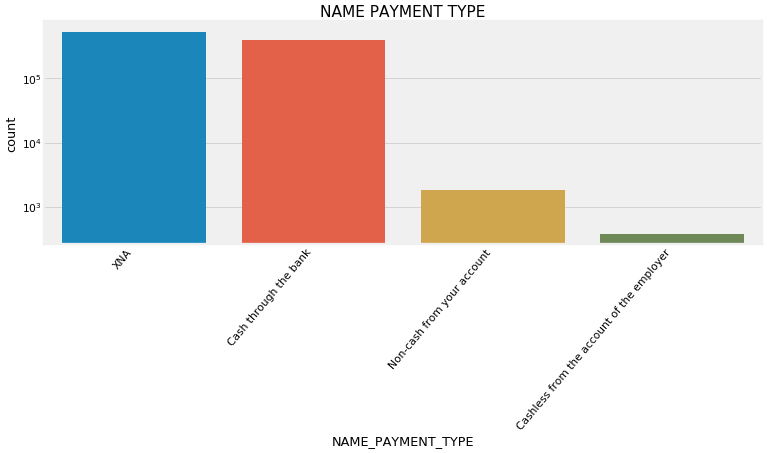

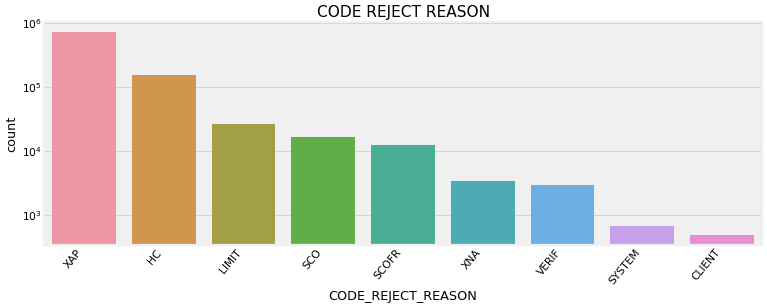

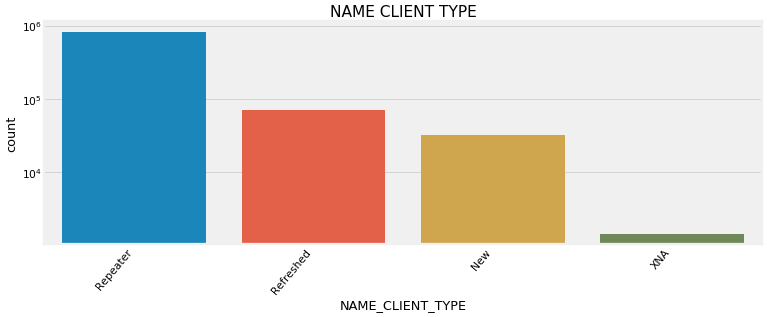

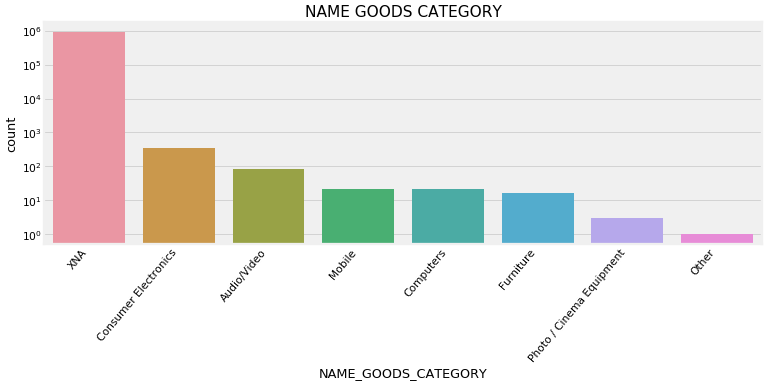

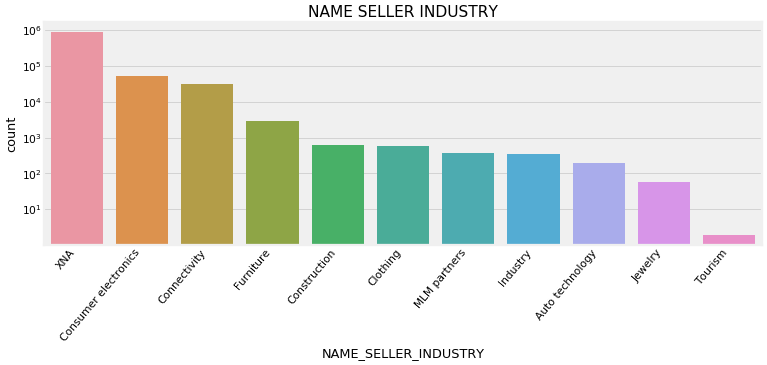

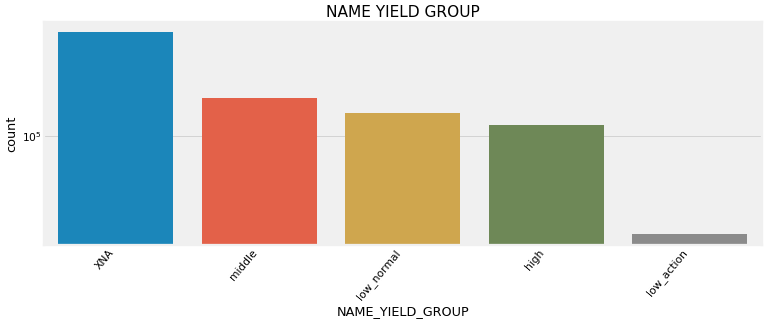

In [106]:
# using countplots for univariate analysis of categorical variables

for i in prev_cat_var:
    
    # set figure size for larger figure
    plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

    # count plot
    ax = sns.countplot(x=Prev_EDA_df[i], data=Prev_EDA_df, order=Prev_EDA_df[i].value_counts().index)

    if len(Prev_EDA_df[i].unique()) > 3:
        
        # rotate and align the tick labels to look better
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

        # changing to a logarithmic scale so that the range can fit into the size of the plot.
        plt.yscale('log')

    # set title
    ax.set_title(' '.join([x for x in i.split('_')]))
    
    # show plot
    plt.show()

### Bivariate analysis of unordered categorical variables w.r.t `NAME_CONTRACT_STATUS`

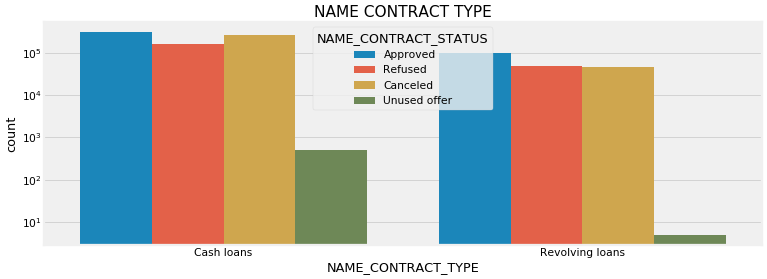

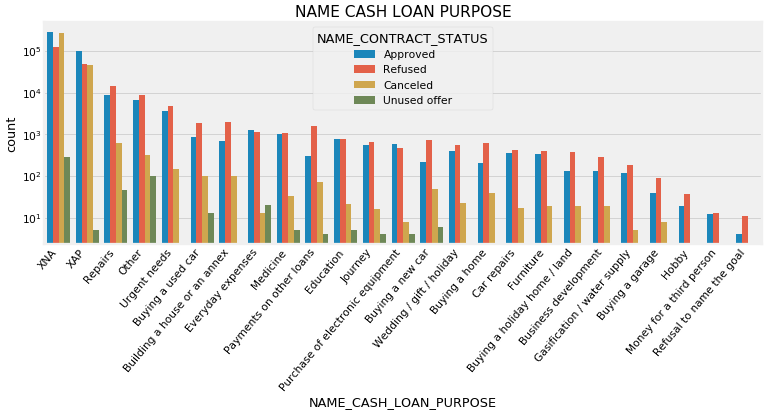

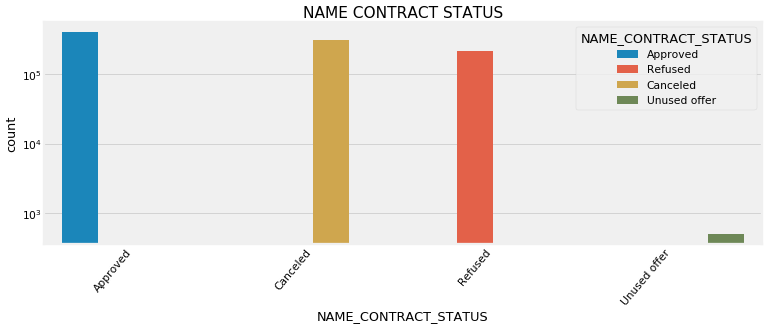

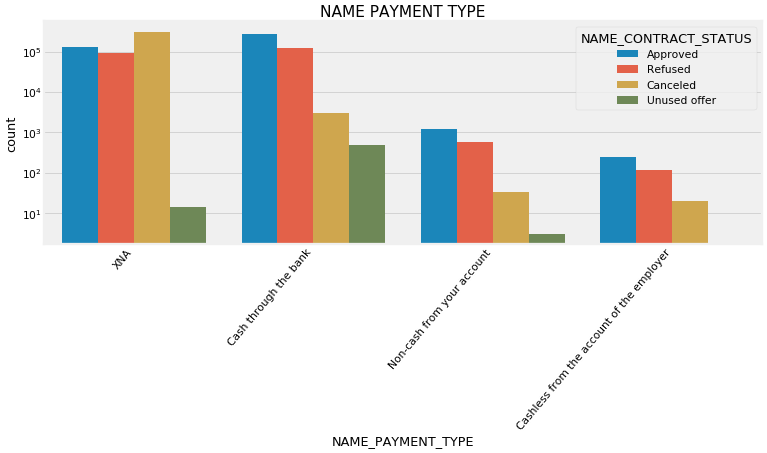

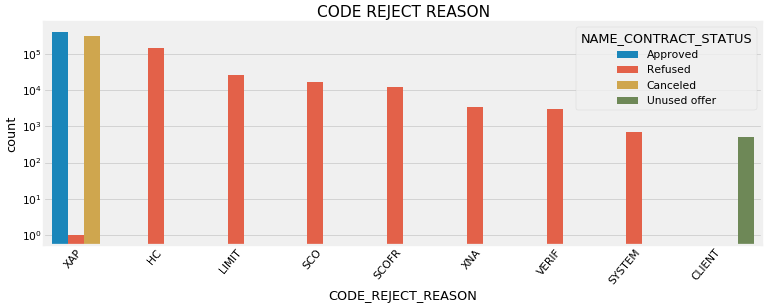

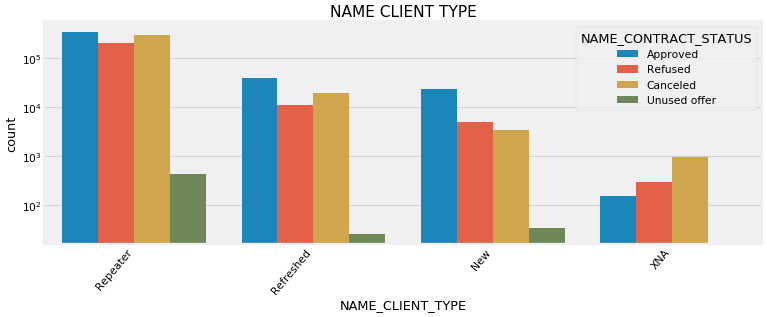

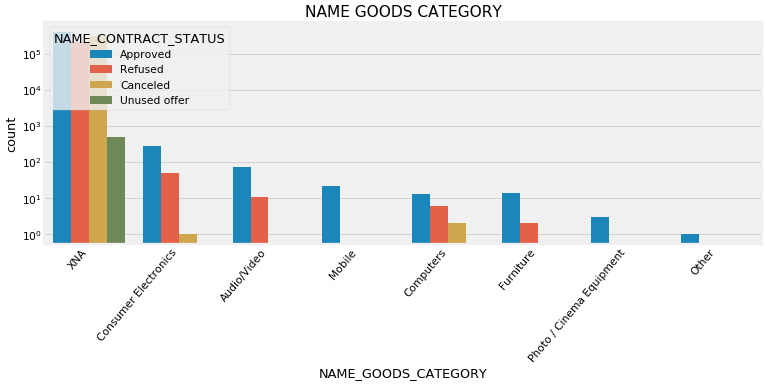

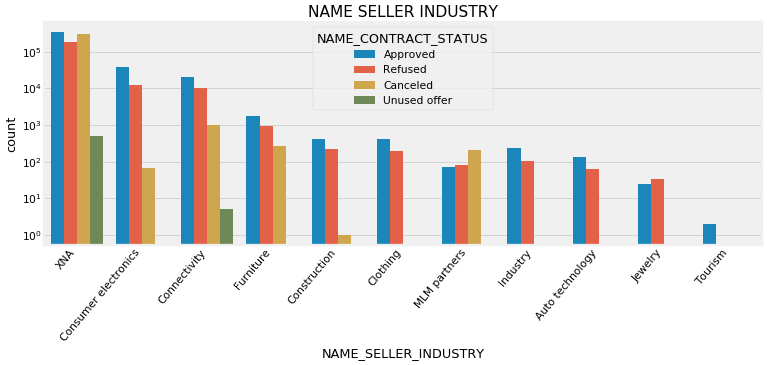

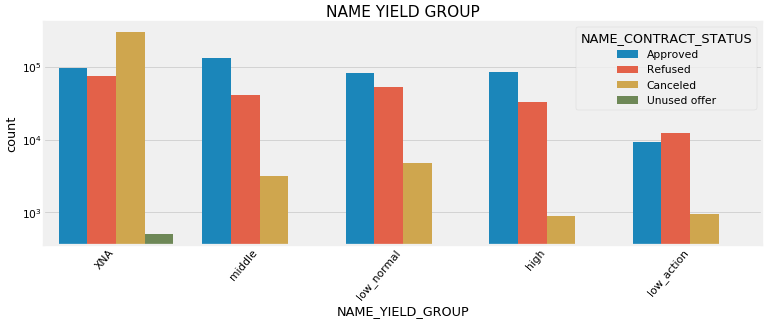

In [107]:
# using countplots for bivariate analysis of categorical variables w.r.t the NAME_CONTRACT_STATUS variable

for i in prev_cat_var:
    
    # set figure size for larger figure
    plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')
    
    # count plot
    ax = sns.countplot(x=Prev_EDA_df[i], data=Prev_EDA_df, hue='NAME_CONTRACT_STATUS', 
                       order=Prev_EDA_df[i].value_counts().index)

    if len(Prev_EDA_df[i].unique()) > 3:
        
        # rotate and align the tick labels to look better
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

    # set title
    ax.set_title(' '.join([x for x in i.split('_')]))
        
    # changing to a logarithmic scale so that the range can fit into the size of the plot.
    plt.yscale('log')

    # show plot
    plt.show()

### Merging the `application_data`  and `previous_application` datasets

In [108]:
# Merging the App_EDA_df and Prev_EDA_df dataframes on common a column - SK_ID_CURR.
# Generating a pivot table after the merge to group by the SK_ID_CURR column
AppPrev_PivDf = pd.pivot_table(pd.merge(App_EDA_df, Prev_EDA_df, how='left', on='SK_ID_CURR', indicator=True), index='SK_ID_CURR')
AppPrev_PivDf.head()

,AGE,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_x,AMT_CREDIT_y,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,FLAG_CONT_MOBILE,FLAG_MOBIL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,TARGET,YEARS_EMPLOYED,YEARS_SINCE_ID_CHANGE,YEARS_SINCE_PHONE_CHANGE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,
100002,25.920548,24700.5,NaN,NaN,406597.5,NaN,351000.0,NaN,202500.0,0,1.0,2.0,2.0,26.294859,1,1,2.0,2.0,2,2,1,1.745205,5.808219,3.106849
100003,45.931507,35698.5,98356.9950,900000.000000,1293502.5,1035882.000,1129500.0,900000.0,270000.0,0,2.0,0.0,0.0,62.224578,1,1,1.0,1.0,1,1,0,3.254795,0.797260,2.268493
100004,52.180822,6750.0,NaN,NaN,135000.0,NaN,135000.0,NaN,67500.0,0,1.0,0.0,0.0,55.591208,1,1,0.0,0.0,2,2,0,0.616438,6.934247,2.232877
100006,52.068493,29686.5,27599.1525,298285.714286,312682.5,333301.500,297000.0,522000.0,135000.0,0,2.0,0.0,0.0,65.044169,1,1,2.0,2.0,2,2,0,8.326027,6.676712,1.690411
100007,54.608219,21865.5,17059.2525,213750.000000,513000.0,238638.375,513000.0,213750.0,121500.0,0,1.0,0.0,0.0,32.273829,1,1,0.0,0.0,2,2,0,8.323288,9.473973,3.030137


In [109]:
# Checking the number of rows and columns in AppPrev_PivDf
AppPrev_PivDf.shape

(307511, 24)

In [110]:
# Describing the statistical parameters of AppPrev_PivDf
AppPrev_PivDf.describe()

,AGE,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_x,AMT_CREDIT_y,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,FLAG_CONT_MOBILE,FLAG_MOBIL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,TARGET,YEARS_EMPLOYED,YEARS_SINCE_ID_CHANGE,YEARS_SINCE_PHONE_CHANGE
count,307511.000000,307499.000000,179048.000000,1.953670e+05,3.075110e+05,1.953670e+05,3.072330e+05,1.699260e+05,307511.000000,307511.000000,307509.000000,306490.000000,306490.000000,306851.000000,307511.000000,307511.000000,306490.000000,306490.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,43.936973,26797.731089,21570.891213,2.288703e+05,5.923130e+05,2.731801e+05,5.279258e+05,3.879834e+05,162626.947877,0.417052,2.152665,0.143421,0.100049,51.439267,0.998133,0.999997,1.422245,1.405292,2.052463,2.031521,0.080729,15.222686,8.203294,2.637969
std,11.956133,13281.539533,14791.580394,2.589401e+05,3.803162e+05,2.795114e+05,3.371547e+05,3.379836e+05,73303.150927,0.722121,0.910682,0.446698,0.362291,19.106015,0.043164,0.001803,2.400989,2.379803,0.509034,0.502737,0.272419,19.430924,4.135481,2.265229
min,20.517808,1615.500000,0.000000,0.000000e+00,4.500000e+04,0.000000e+00,4.050000e+04,0.000000e+00,25650.000000,0.000000,1.000000,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,34.008219,16524.000000,11275.520625,5.625000e+04,2.700000e+05,9.000000e+04,2.385000e+05,1.550000e+05,112500.000000,0.000000,2.000000,0.000000,0.000000,39.245742,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.556164,4.712329,0.750685
50%,43.150685,24903.000000,18661.627687,1.518750e+05,5.135310e+05,1.947510e+05,4.500000e+05,2.790000e+05,147150.000000,0.000000,2.000000,0.000000,0.000000,56.596143,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,6.079452,8.915068,2.073973
75%,53.923288,34596.000000,28372.938750,3.105000e+05,8.086500e+05,3.700910e+05,6.795000e+05,5.130000e+05,202500.000000,1.000000,3.000000,0.000000,0.000000,66.361709,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,15.635616,11.778082,4.301370
max,69.120548,61704.000000,224403.075000,4.050000e+06,1.616625e+06,4.050000e+06,1.341000e+06,4.050000e+06,337500.000000,19.000000,20.000000,34.000000,24.000000,85.499967,1.000000,1.000000,348.000000,344.000000,3.000000,3.000000,1.000000,54.794521,19.717808,11.758904


In [111]:
# Checking the necessary info for AppPrev_PivDf
AppPrev_PivDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 24 columns):
AGE                            307511 non-null float64
AMT_ANNUITY_x                  307499 non-null float64
AMT_ANNUITY_y                  179048 non-null float64
AMT_APPLICATION                195367 non-null float64
AMT_CREDIT_x                   307511 non-null float64
AMT_CREDIT_y                   195367 non-null float64
AMT_GOODS_PRICE_x              307233 non-null float64
AMT_GOODS_PRICE_y              169926 non-null float64
AMT_INCOME_TOTAL               307511 non-null float64
CNT_CHILDREN                   307511 non-null int64
CNT_FAM_MEMBERS                307509 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE       306490 non-null float64
DEF_60_CNT_SOCIAL_CIRCLE       306490 non-null float64
EXT_SOURCE_2                   306851 non-null float64
FLAG_CONT_MOBILE               307511 non-null int64
FLAG_MOBIL                     307511 non-null int64
OBS_30_CNT

#### Checking NaN values in the dataset

In [112]:
AppPrev_PivDf.isnull().sum()

AGE                                 0
AMT_ANNUITY_x                      12
AMT_ANNUITY_y                  128463
AMT_APPLICATION                112144
AMT_CREDIT_x                        0
AMT_CREDIT_y                   112144
AMT_GOODS_PRICE_x                 278
AMT_GOODS_PRICE_y              137585
AMT_INCOME_TOTAL                    0
CNT_CHILDREN                        0
CNT_FAM_MEMBERS                     2
DEF_30_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
EXT_SOURCE_2                      660
FLAG_CONT_MOBILE                    0
FLAG_MOBIL                          0
OBS_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
TARGET                              0
YEARS_EMPLOYED                      0
YEARS_SINCE_ID_CHANGE               0
YEARS_SINCE_PHONE_CHANGE            1
dtype: int64

#### Calculating %NaN values for each column

In [113]:
AppPrev_PivDf.isnull().sum() * 100 / len(Prev_EDA_df)

AGE                             0.000000
AMT_ANNUITY_x                   0.001276
AMT_ANNUITY_y                  13.655860
AMT_APPLICATION                11.921120
AMT_CREDIT_x                    0.000000
AMT_CREDIT_y                   11.921120
AMT_GOODS_PRICE_x               0.029552
AMT_GOODS_PRICE_y              14.625546
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
CNT_FAM_MEMBERS                 0.000213
DEF_30_CNT_SOCIAL_CIRCLE        0.108534
DEF_60_CNT_SOCIAL_CIRCLE        0.108534
EXT_SOURCE_2                    0.070159
FLAG_CONT_MOBILE                0.000000
FLAG_MOBIL                      0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.108534
OBS_60_CNT_SOCIAL_CIRCLE        0.108534
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
TARGET                          0.000000
YEARS_EMPLOYED                  0.000000
YEARS_SINCE_ID_CHANGE           0.000000
YEARS_SINCE_PHONE_CHANGE        0.000106
dtype: float64

In [114]:
# Converting the data type of CNT_CHILDREN column from int to float
AppPrev_PivDf['CNT_CHILDREN']=AppPrev_PivDf['CNT_CHILDREN'].astype('float64')

In [115]:
# Finding correlation in AppPrev_PivDf for the continous variables
AppPrev_PivDf.select_dtypes(['float64']).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,AGE,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_x,AMT_CREDIT_y,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,YEARS_EMPLOYED,YEARS_SINCE_ID_CHANGE,YEARS_SINCE_PHONE_CHANGE
AGE,1,-0.012,0.054,0.094,0.057,0.08,0.057,0.084,-0.078,-0.33,-0.28,-0.00021,-0.0019,0.092,-0.0074,-0.007,0.67,0.27,0.083
AMT_ANNUITY_x,-0.012,1,0.31,0.19,0.79,0.19,0.8,0.25,0.49,0.023,0.08,-0.022,-0.024,0.13,-0.01,-0.0097,-0.09,-0.014,0.068
AMT_ANNUITY_y,0.054,0.31,1,0.72,0.26,0.72,0.27,0.79,0.36,-0.0012,0.049,-0.022,-0.023,0.12,-0.008,-0.0077,-0.036,-0.0045,0.098
AMT_APPLICATION,0.094,0.19,0.72,1,0.21,0.96,0.22,0.85,0.24,-0.02,0.028,-0.0069,-0.011,0.085,0.015,0.015,0.013,0.02,0.12
AMT_CREDIT_x,0.057,0.79,0.26,0.21,1,0.22,0.99,0.27,0.41,0.0022,0.065,-0.021,-0.023,0.13,0.0013,0.0014,-0.038,0.0063,0.079
AMT_CREDIT_y,0.08,0.19,0.72,0.96,0.22,1,0.22,0.85,0.25,-0.017,0.033,-0.0064,-0.011,0.089,0.014,0.014,-0.0061,0.016,0.14
AMT_GOODS_PRICE_x,0.057,0.8,0.27,0.22,0.99,0.22,1,0.28,0.41,-0.0017,0.063,-0.022,-0.024,0.14,0.0017,0.0017,-0.035,0.0087,0.083
AMT_GOODS_PRICE_y,0.084,0.25,0.79,0.85,0.27,0.85,0.28,1,0.32,-0.013,0.047,-0.018,-0.021,0.11,0.0084,0.0086,-0.0055,0.0098,0.13
AMT_INCOME_TOTAL,-0.078,0.49,0.36,0.24,0.41,0.25,0.41,0.32,1,0.029,0.037,-0.032,-0.032,0.17,-0.026,-0.026,-0.16,-0.028,0.064
CNT_CHILDREN,-0.33,0.023,-0.0012,-0.02,0.0022,-0.017,-0.0017,-0.013,0.029,1,0.88,-0.0013,-0.0019,-0.018,0.016,0.015,-0.25,0.028,0.0059


In [116]:
# Creating two separate dataframes for Target values 0 and 1
AppPrev_PivDf_Target0 = AppPrev_PivDf[AppPrev_PivDf['TARGET']==0]
AppPrev_PivDf_Target1 = AppPrev_PivDf[AppPrev_PivDf['TARGET']==1]

In [117]:
# Finding correlation in AppPrev_PivDf_Target0 for the continous variables
AppPrev_PivDf_Target0.select_dtypes(['float64']).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,AGE,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_x,AMT_CREDIT_y,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,YEARS_EMPLOYED,YEARS_SINCE_ID_CHANGE,YEARS_SINCE_PHONE_CHANGE
AGE,1,-0.015,0.047,0.089,0.049,0.074,0.048,0.077,-0.086,-0.34,-0.29,0.0031,0.00099,0.078,-0.0077,-0.0073,0.67,0.27,0.077
AMT_ANNUITY_x,-0.015,1,0.32,0.19,0.79,0.19,0.8,0.25,0.49,0.022,0.08,-0.022,-0.023,0.13,-0.011,-0.011,-0.092,-0.017,0.067
AMT_ANNUITY_y,0.047,0.32,1,0.72,0.26,0.72,0.27,0.79,0.36,-6.4e-05,0.05,-0.022,-0.022,0.12,-0.0094,-0.0091,-0.041,-0.0085,0.093
AMT_APPLICATION,0.089,0.19,0.72,1,0.21,0.96,0.22,0.85,0.24,-0.02,0.028,-0.0061,-0.0096,0.081,0.013,0.013,0.0086,0.016,0.12
AMT_CREDIT_x,0.049,0.79,0.26,0.21,1,0.22,0.99,0.28,0.41,0.0031,0.066,-0.019,-0.022,0.13,0.00017,0.00021,-0.045,0.0012,0.075
AMT_CREDIT_y,0.074,0.19,0.72,0.96,0.22,1,0.22,0.85,0.25,-0.017,0.033,-0.0061,-0.0099,0.085,0.012,0.012,-0.011,0.012,0.14
AMT_GOODS_PRICE_x,0.048,0.8,0.27,0.22,0.99,0.22,1,0.28,0.42,-0.00046,0.065,-0.02,-0.023,0.14,0.00064,0.00065,-0.043,0.003,0.078
AMT_GOODS_PRICE_y,0.077,0.25,0.79,0.85,0.28,0.85,0.28,1,0.32,-0.012,0.048,-0.017,-0.019,0.1,0.0065,0.0067,-0.012,0.0054,0.12
AMT_INCOME_TOTAL,-0.086,0.49,0.36,0.24,0.41,0.25,0.42,0.32,1,0.032,0.04,-0.032,-0.032,0.17,-0.028,-0.028,-0.17,-0.032,0.062
CNT_CHILDREN,-0.34,0.022,-6.4e-05,-0.02,0.0031,-0.017,-0.00046,-0.012,0.032,1,0.88,-0.0022,-0.0022,-0.015,0.014,0.014,-0.25,0.029,0.0085


In [118]:
# Finding correlation in AppPrev_PivDf_Target1 for the continous variables
AppPrev_PivDf_Target1.select_dtypes(['float64']).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,AGE,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_x,AMT_CREDIT_y,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,YEARS_EMPLOYED,YEARS_SINCE_ID_CHANGE,YEARS_SINCE_PHONE_CHANGE
AGE,1,0.013,0.095,0.15,0.14,0.14,0.14,0.14,-0.0027,-0.26,-0.2,-0.0049,-0.004,0.11,0.0052,0.0054,0.62,0.25,0.11
AMT_ANNUITY_x,0.013,1,0.26,0.17,0.76,0.16,0.76,0.2,0.44,0.032,0.077,-0.022,-0.028,0.12,0.0059,0.007,-0.069,0.015,0.081
AMT_ANNUITY_y,0.095,0.26,1,0.73,0.23,0.75,0.24,0.81,0.33,-0.0018,0.048,-0.0099,-0.017,0.11,0.017,0.017,-0.0082,0.016,0.14
AMT_APPLICATION,0.15,0.17,0.73,1,0.22,0.96,0.23,0.85,0.22,-0.014,0.037,-0.0071,-0.018,0.096,0.041,0.041,0.048,0.048,0.16
AMT_CREDIT_x,0.14,0.76,0.23,0.22,1,0.22,0.98,0.25,0.36,-0.001,0.053,-0.026,-0.031,0.12,0.02,0.021,0.031,0.052,0.11
AMT_CREDIT_y,0.14,0.16,0.75,0.96,0.22,1,0.23,0.85,0.23,-0.014,0.04,-0.0013,-0.011,0.1,0.043,0.043,0.038,0.053,0.18
AMT_GOODS_PRICE_x,0.14,0.76,0.24,0.23,0.98,0.23,1,0.26,0.36,-0.0072,0.05,-0.023,-0.027,0.13,0.021,0.021,0.037,0.057,0.12
AMT_GOODS_PRICE_y,0.14,0.2,0.81,0.85,0.25,0.85,0.26,1,0.29,-0.016,0.045,-0.015,-0.027,0.11,0.037,0.037,0.044,0.039,0.17
AMT_INCOME_TOTAL,-0.0027,0.44,0.33,0.22,0.36,0.23,0.36,0.29,1,-0.0025,0.0054,-0.024,-0.025,0.15,-0.0048,-0.0042,-0.11,0.004,0.086
CNT_CHILDREN,-0.26,0.032,-0.0018,-0.014,-0.001,-0.014,-0.0072,-0.016,-0.0025,1,0.89,0.0014,-0.0051,-0.012,0.026,0.025,-0.19,0.032,-0.012


# End of Group Case Study 1 analysis